# Support Vector Machine e Classificação de Sentimentos em Textos



---




**Data de entrega:** Até 12 de Maio de 2024

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.







###❗Exercício❗
Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:

*Assinatura:* João Pedro Lopes Wunderlich



---





## Pre-requisitos

Primeiro vamos carregar algumas bibliotecas: Numpy, Scipy Linear Algebra (scipy.linalg), Pandas, System (sys) e Time (time)

In [2]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

import sys
import time

Agora vamos definir alguns números especiais ("magic") para cada aluno, com base no seu número USP. eles serão usados para personalizar a sua Atividade Computacional.

## ❗Exercício❗

Preencha o seu número USP abaixo

In [3]:
# Coloque aqui o seu número USP
nusp = 10282536

Estes números serão importantes para a atividade:

In [4]:
nusp_str=str(nusp).replace("0","")

magic_ilong = int(nusp_str)
magic_ishort = int(str(magic_ilong)[:2])

# Ultimo digito não nulo do nusp
magic_int = int(list(nusp_str)[-1])


print("magic_ilong  =", magic_ilong)
print("magic_ishort =", magic_ishort)
print("magic_int =", magic_int)


magic_ilong  = 1282536
magic_ishort = 12
magic_int = 6




---




## Método de Newton multidimensional

Considere uma curva no plano, que podemos representar como uma curva de nível de uma função:

$$
f(x,y) = 0
$$

Por exemplo,
$$
f(x,y) = x^2 + y ^2 - c = 0
$$
define um cículo no plano centrado no $(0,0)$ com raio $\sqrt{c}$.

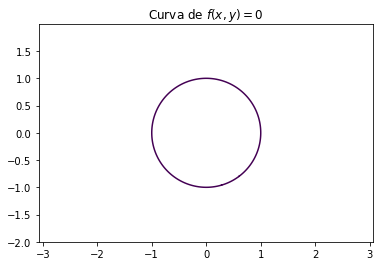

In [5]:
#Função
def f(x,y):
  # c=1
  return x**2+y**2 - 1.0


# Amostra de pontos no plano
x = np.arange(-2.0, 2.0, 0.01)
y = np.arange(-2.0, 2.0, 0.01)
X, Y = np.meshgrid(x, y)

# Funcão
Z = f(X,Y)

#Gráfico
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [0.0])
#ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Curva de $f(x,y)=0$')
ax.axis('equal')

plt.show()

Agora suponha que temos 2 curvas,
$$
f_1(x,y) = 0 \\
f_2(x,y) = 0
$$
Por exemplo um cículo e uma elipse
$$
f_1(x,y) = x^2 + y ^2 - 1 = 0 \\
f_2(x,y) = x^2/2 + 3y ^2 -2 = 0
$$

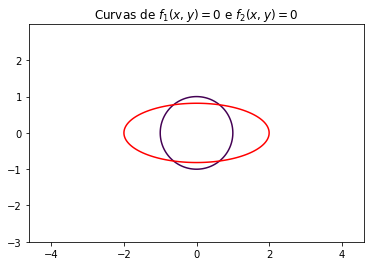

In [6]:
def f1(x,y):
  return x**2+y**2 -1

def f2(x,y):
  return x**2/2+3*y**2 - 2

# Amostra de pontos no plano
x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x, y)

# Funcão
Zf1 = f1(X,Y)
Zf2 = f2(X,Y)

#Gráfico
fig, ax = plt.subplots()
CSf = ax.contour(X, Y, Zf1, [0.0])
CSg = ax.contour(X, Y, Zf2, [0.0], colors=('r'))
ax.set_title('Curvas de $f_1(x,y)=0$ e $f_2(x,y)=0$')
ax.axis('equal')

plt.show()

> Como podemos fazer para achar os pontos de intersecção entre as curvas? Ou seja, um ponto $(x,y)$ onde tanto $f_1$ quanto $f_2$ são zero?

Uma forma é usando o método de Newton, mas neste caso ele é bidimensional. Para facilitar a notação, escrevemos:

$$
F(\vec{x}) =\left(
\begin{array}{c}
f_1(x,y) \\
f_2(x,y)
\end{array} \right)
$$
onde $\vec{x}=(x,y)$. Logo, queremos encontrar um ponto $\vec{x}$ tal que $F(\vec{x})=\vec{0}$, onde indicamos $\vec{0}=(0,0)$.

Nessa notação, poderíamos considerar $\vec{x} \in \mathbb{R}^N$ e $F: \mathbb{R}^N → \mathbb{R}^N $, e podemos escrever o método de Newton como

$$
\vec{x}_{k+1}= \vec{x}_{k} - [F'(\vec{x}_{k})]^{-1} F(\vec{x}_{k}),
$$
sendo $\vec{x}_{0}$ dado, e $F'$ representa a Jacobiana (matriz de derivadas $\partial F_i/ \partial x_j$) de $F$.

Note que a cada iteração precisamos calcular uma inversa de uma matriz. Para evitar esse cálculo explícito, transformamos cada passo de Newton em um problema de resolver um sistema linear:

$$
F'(\vec{x}_{k}) \vec{d}_{k} = - F(\vec{x}_{k}),
$$
e depois calculamos
$$
\vec{x}_{k+1}= \vec{x}_{k} + \vec{d}_{k}.
$$

Vamos voltar ao nosso exemplo de calcular os pontos de intersecção de curvas de níveis. No exemplo do círculo e elipse, queremos resolver
$$
F(\vec{x}) =\left(
\begin{array}{c}
x^2+y^2 - 1 \\
x^2/2+3y^2 - 2
\end{array} \right)
=
\left(
\begin{array}{c}
0 \\
0
\end{array} \right).
$$
e a Jacobiana de $F$ é dada por (verifique!)
$$
F'(\vec{x}) =\left(
\begin{array}{cc}
2x & 2y \\
x  & 6y
\end{array} \right).
$$
Para o método de Newton, a cada iteração precisamos resovler o seguinte sistema linear
$$
\left(
\begin{array}{cc}
2x_k & 2y_k \\
x_k  & 6y_k
\end{array} \right) \left(
\begin{array}{c}
dx_k \\
dy_k
\end{array} \right)
 = -\left(
\begin{array}{c}
x_k^2+y_k^2 - 1 \\
x_k^2/2+3y_k^2 - 1
\end{array} \right),
$$
e atualizamos o passo fazendo
$$
\left(
\begin{array}{c}
x_{k+1} \\
y_{k+1}
\end{array} \right)=
\left(
\begin{array}{c}
dx_k \\
dy_k
\end{array} \right)+
\left(
\begin{array}{c}
x_k \\
y_k
\end{array} \right).
$$

### ❗Exercício 1❗

Escreva um código em Python que encontre os pontos de intersecção de curvas de níveis no plano, com as seguintes características:

1. Considere como problema a ser resolvido o problema de intersecção do círculo e elipse com
$$
F(\vec{x}) =\left(
\begin{array}{c}
x^2+y^2 - 1 \\
x^2/M+3y^2 - 2
\end{array} \right)
=
\left(
\begin{array}{c}
0 \\
0
\end{array} \right).
$$

onde $M$ é o seu número "magic_int", definido com base no seu número USP (é o último dígito não nulo do seu número USP).
2. Escreva uma função que recebe um ponto $(x,y)$ e calcula a $F(x,y)$ (note que ela recebe $(x,y)$ e devolve um vetor em $\mathbb{R}^2$)
3. Escreva uma função que recebe um ponto $(x,y)$ e calcula a matriz $F'(x,y)$.
4. Escreva uma função que recebe um ponto $(x_k, y_k)$ e resolve o sistema linear $F'(x_k,y_k) \vec{d}_k = - F(x_k,y_k) $. Para a resolução do sistema linear, você pode implementar o seu próprio resolvedor, com eliminação de Gauss por exemplo, ou usar uma implementação do Python (Numpy/Scipy).
5. Seu código final deve começar com um chute inicial $(x_0, y_0)$ e aplicar sucessivas iterações do método de Newton para encontrar os pontos de intersecção das curvas.
6. Cuidado! Você deve impor um número máximo de iterações e algum critério de parada, por exemplo quando $\|F(x,y)\| < 10e{-6}$. Caso em algum passo o sistema linear não tenha solução (determinante nulo), seu código deve retornar ao usuário um aviso (erro).

Com o seu código pronto, responda as perguntas:

1. Escreva as estimativas encontradas para os 4 pontos de intersecção das curvas.
2. Como fazemos para encontrar um ponto de intersecção ao invés de outro?
3. O método de Newton funciona para qualquer chute inicial? Sempre converge para um ponto de intersecção? Quando ele não funciona?

In [7]:
# F(x,y)


def f1_func(x, y):
    return x**2 + y**2 - 1


def f2_func(x, y):
    return x**2 / magic_int + 3 * y**2 - 2


def F_func(x, y):

    f1 = f1_func(x, y)
    f2 = f2_func(x, y)

    matrix = np.array([[f1], [f2]])

    return matrix


# F'(x,y)


def f1_linha_x_func(x, y):
    return 2 * x


def f1_linha_y_func(x, y):
    return 2 * y


def f2_linha_x_func(x, y):
    return 2 * x / magic_int


def f2_linha_y_func(x, y):
    return 6 * y


def F_linha_func(x, y):

    f1_linha_x = f1_linha_x_func(x, y)
    f1_linha_y = f1_linha_y_func(x, y)
    f2_linha_x = f2_linha_x_func(x, y)
    f2_linha_y = f2_linha_y_func(x, y)

    matrix = np.array([[f1_linha_x, f1_linha_y], [f2_linha_x, f2_linha_y]])

    return matrix


# Sistema Linear


def sist_linear(x, y):

    f_matrix = F_func(x, y)
    f_linha_matrix = F_linha_func(x, y)

    if np.linalg.det(f_linha_matrix) == 0:
        raise Exception("Erro - sistema linear sem solução (determinante = 0)")

    x_matrix = la.solve(f_linha_matrix, -f_matrix)

    return x_matrix


# Método de Newton


def newton_method(x, y):

    iteracoes = 1

    # if np.linalg.det(F_func(x, y)) == 0:
    # 	raise Exception("Erro - sistema linear sem solução (determinante = 0)")

    solved_matrix = sist_linear(x, y)

    dxk = solved_matrix[0][0]
    dyk = solved_matrix[0][0]

    xki = dxk + x
    yki = dyk + y

    norm = np.linalg.norm(F_func(x, y))

    while norm > 10 ** (-6) and iteracoes < 100:

        # if np.linalg.det(F_func(x, y)) == 0:
        # 	raise Exception("Erro - sistema linear sem solução (determinante = 0)")

        solved_matrix = sist_linear(xki, yki)

        dxk = solved_matrix[0][0]
        dyk = solved_matrix[1][0]

        xki = dxk + xki
        yki = dyk + yki

        iteracoes += 1

        norm = np.linalg.norm(F_func(xki, yki))

    print("x = ", xki)
    print("y = ", yki)
    print("nº de iterações = ", iteracoes)

    return xki, yki, iteracoes


x =  -0.5940885257860047
y =  0.8043996667931244
nº de iterações =  5


(-5.0, 4.989999999999787, -3.0, 2.9899999999998723)

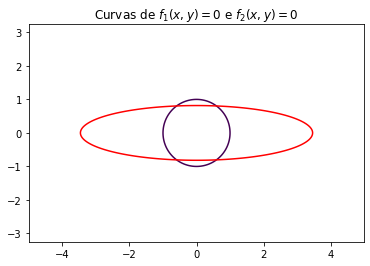

In [8]:
x_inicial = -1
y_inicial = 1

newton_method(x_inicial, y_inicial)

# Amostra de pontos no plano
x_inicial = np.arange(-5.0, 5.0, 0.01)
y_inicial = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x_inicial, y_inicial)

# Funcão
Zf1 = f1_func(X, Y)
Zf2 = f2_func(X, Y)

# Gráfico
fig, ax = plt.subplots()
CSf = ax.contour(X, Y, Zf1, [0.0])
CSg = ax.contour(X, Y, Zf2, [0.0], colors=("r"))
ax.set_title("Curvas de $f_1(x,y)=0$ e $f_2(x,y)=0$")
ax.axis("equal")

Respostas das perguntas:
1. Escreva as estimativas encontradas para os 4 pontos de intersecção das curvas.
   + Estimativa 1: (x $\approx$ 0.5940887305815177, y $\approx$ 0.8043996676582439)
   + Estimativa 2: (x $\approx$ 0.5940885257860046, y $\approx$ -0.8043996665408345)
   + Estimativa 3: (x $\approx$ -0.5940887305815177, y $\approx$ 0.8043996665408345)
   + Estimativa 4: (x $\approx$ -0.5940887305815177, y $\approx$ -0.8043996676582439)
2. Como fazemos para encontrar um ponto de intersecção ao invés de outro?
Para encontrar um ponto de intersecção ao invés de outro, devemos identificar o intervalo de convergência para cada ponto de intersecção das curvas.
   + Para $ x_{inicial} \in \ ]0,+\infty[ \ e \ y_{inicial} \in \ ]0,+\infty[ \ \rightarrow $ Estimativa 1
   + Para $ x_{inicial} \in \ ]0,+\infty[ \ e \ y_{inicial} \in \ ]-\infty, 0[ \ \rightarrow $ Estimativa 2
   + Para $ x_{inicial} \in \ ]-\infty, 0[ \ e \ y_{inicial} \in \ ]0,+\infty[ \ \rightarrow $ Estimativa 3
   + Para $ x_{inicial} \in \ ]-\infty, 0[ \ e \  y_{inicial} \in \ ]-\infty, 0[ \ \rightarrow $ Estimativa 4
3. O método de Newton não converge se $ x_{inicial} = 0 $ e/ou $ y_{inicial} = 0 $, pois gera um sistema linear sem solução (determinante nulo)



---



## Classificação de Dados

#### Exemplo em dimensão 2


Suponha que temos informações da nota do ENEM de vários alunos que passaram na USP e na UNICAMP, por exemplo formando a tabela


|Aluno | Onde passou | Nota Matemática | Nota Português |
|------|-------------|-----------------|----------------|
|João | USP | 9 | 7 |
|José | USP | 10 | 6 |
|Maria | UNICAMP | 7 | 8 |
|Rosa | USP | 10 | 4 |
|Pedro | UNICAMP | 3 | 7 |
|Carlos | UNICAMP | 6 | 9 |
|Daniel | USP | 9 | 5 |
|Mario | UNICAMP | 7 | 9 |
|Ronaldo | USP | 7 | 5 |
| ...  | ... | ... | ...|

Seria possível montar algum modelo que permitir dizer onde um aluno que não está nessa tabela (novo aluno) passou olhando apenas as suas notas do ENEM?


Esse é um problema de classificação. Montamos um modelo com base nesses dados (treinamos um modelo com dados) e usamos esse modelo para classificar novos dados. Esse é um dos objetivo de um modelo que usa **Support Vector Machine** (SVM).

> É claro que esse exemplo é fictício e simplificado, mas ele já nos fornece desafios suficientes para entendermos como funciona o SVM!

Vamos tentar entender o SVM com base nesse exemplo acima. Primeiro vamos fazer um gráfico das notas em relação às notas nas duas áreas, separando pelas duas categorias (universidades).

      aluno     univ  nota_mat  nota_port
0      João      USP         9          7
1      José      USP        10          6
2     Maria  UNICAMP         7          8
3      Rosa      USP        10          4
4     Pedro  UNICAMP         3          7
5    Carlos  UNICAMP         6          9
6    Daniel      USP         9          5
7     Mario  UNICAMP         7          9
8   Ronaldo      USP         7          5
9     André      USP         5          3
10  Gabriel  UNICAMP         3          9
11   Nelson      USP         8          4
12  Cláudia      USP         9          3
13    Fábio  UNICAMP         5          6
14  Cláudio      USP         6          5
15  Armando  UNICAMP         5          8


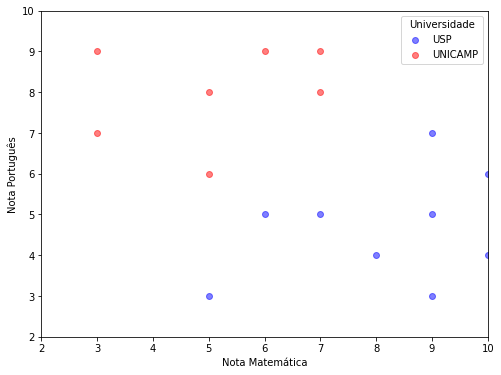

In [9]:
dados = {
    'aluno': ['João', 'José', 'Maria', 'Rosa', 'Pedro', 'Carlos', 'Daniel', 'Mario', 'Ronaldo', 'André', 'Gabriel', 'Nelson', 'Cláudia', 'Fábio', 'Cláudio', 'Armando'],
    'univ': ['USP', 'USP', 'UNICAMP', 'USP', 'UNICAMP', 'UNICAMP', 'USP', 'UNICAMP', 'USP', 'USP', 'UNICAMP', 'USP', 'USP', 'UNICAMP', 'USP', 'UNICAMP'],
    'nota_mat':  [9, 10, 7, 10, 3, 6, 9, 7, 7, 5, 3, 8, 9, 5, 6, 5],
    'nota_port': [7,  6, 8,  4, 7, 9, 5, 9, 5, 3, 9, 4, 3, 6, 5, 8]
}

df = pd.DataFrame(dados)

# Definir cores com base na variável 'local'
cores = {'USP': 'blue', 'UNICAMP': 'red'}

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.axis([2, 10, 2, 10])

# Exibir o gráfico
print(df)
plt.show()
#print(df)


Queremos achar, inicialmente, uma reta que corta esse plano e separa as notas das duas universidades. Nem sempre isso é possível, mas nesse caso, parece que as notas da UNICAMP e da USP tem um certo agrupamento.

Vamos começar com um pouco de matemática. Para cada aluno $(i)$ temos as seguintes informações:
- $y_i$ : será $-1$ se for USP e $+1$ se for UNICAMP
- $\vec{x}_i$: um vetor de tamanho 2 com as notas de matemática e português, nessa ordem. No caso geral, esse vetor por ter tamanho arbitrário (chamaremos de $p$), com as características que nos interessam.

Logo, temos um conjunto para os $n$ alunos dado por:
$$
(\vec{x}_1, y_1)\\
(\vec{x}_2, y_2)\\
... \\
(\vec{x}_n, y_n)
$$
com $\vec{x}_i \in \mathbb{R}^p$.




> **Objetivo**: Achar a reta (ou hiperplano no caso geral) que divida os pontos $\vec{x}_i$ de forma a separar os grupos de pontos com base em $y_i=\pm 1$. Formalmente, queremos uma reta (hiperplano) que maximize a distancia entre ela e o ponto mais próximo de cada grupo.


Podemos escrever retas escolhendo valores $a$, $b$ e $c$ tais que
$$ ax+by-c=0,$$
ou, analogamente para hiperplanos, escolhendo vetores $w \in \mathbb{R}^p$
$$ w^T\vec{x}-c=0,$$
com $\vec{x}\in \mathbb{R}^p$ o vetor de coordenadas do $\mathbb{R}^p$



Vejamos no nosso exemplo, chutando valores de $w$ e $c$:

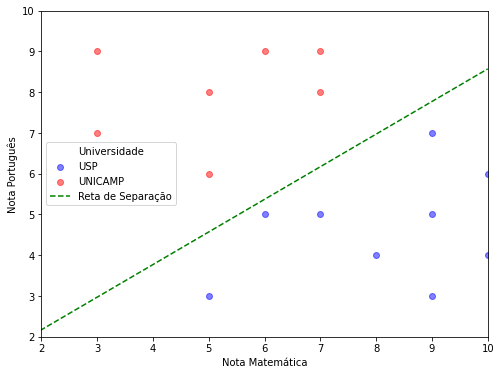

In [10]:
plt.figure(figsize=(8, 6))

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)


#Reta (chutamos esses valores!)
# ax+by-c = 0,  wx - c = 0,  w= (a, b)
b = 3.5
a = -2.8
c = 2.0

# Fazendo o gráfico da reta usando 2 pontos da reta
x0 = 0
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

# Adicionar rótulos e título
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.axis([2, 10, 2, 10])
plt.show()


Será que esse chute foi uma boa escolha para separar os grupos? Como achar "a melhor reta"?

> Se acharmos a tal reta, podemos usar ela para categorizar novos dados! Basta olhar se o dado está "acima" ou "abaixo" da reta e classificar ele como USP ou UNICAMP! Isso daria uma previsão de qual universidade o novo aluno deve ter ido. Essa previsão será melhor ou pior a depender do ajuste da nossa reta.

Note que qualquer reta de separação temos que os pontos da USP estão "abaixo" da reta, satisfazendo
$$ ax+by-c < 0,$$
ou no caso geral
$$ w^T\vec{x}-c < 0,$$
e os pontos da UNICAMP estão "acima" da reta, com
$$ w^T\vec{x}-c > 0.$$





Para que possamos medir a qualidade do classificador, adicionamos uma margem de mais ou menos um a essa reta (hiperplano) e impomos que uma categoria deve satisfazer
$$ w^T\vec{x}_i-c\geq1, $$
para $ i \in \text{UNICAMP}$, isto é, $i$ tal que $y_i=+1$,
e a outra com
$$ w^T\vec{x}_i-c\leq-1,$$
para $ i \in \text{USP}$, isto é, $i$ tal que $y_i=-1$. Resumidamente, considerando os dois grupos, podemos escrever que
$$ y_i(w^T\vec{x}_i-c)\geq1.$$

No exemplo anterior, com a nossa reta chutada, as retas que definem as margem são $ w^T\vec{x}-c=\pm 1$, como podemos ver na figura a seguir.

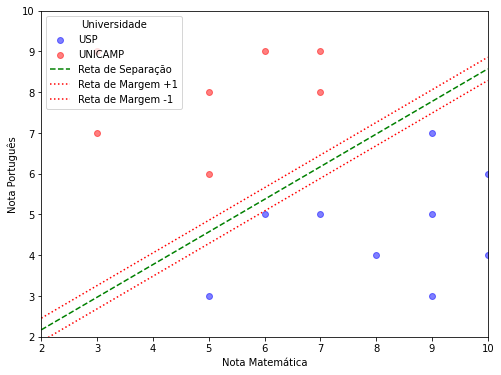

In [11]:
plt.figure(figsize=(8, 6))

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta (chutada)
# ax+by-c = 0 ou  wx - c = 0,  w= (a, b)
b = 3.5
a = -2.8
c = 2.0

# Gráficos das retas
#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# ax+by-c = 1
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# ax+by-c = -1
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()


> O método SVM irá buscar uma reta de separação/classificação de tal forma a separar os grupos e tentando aumentar a distância entre as margens! Isso é um problema de otimização, que vamos discutir a seguir.

Veja um exemplo onde tentamos aumentar a margem (distância entre as retas de suporte).

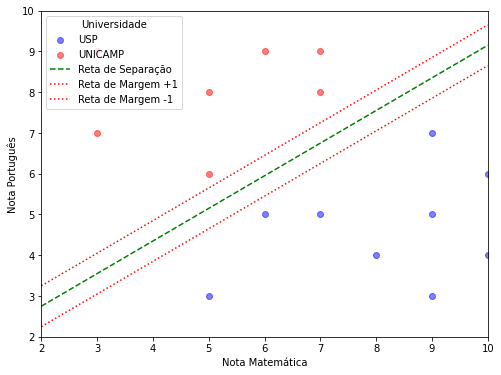

In [12]:
plt.figure(figsize=(8, 6))

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# ax+by-c = 0
# wx - c = 0, w =(a,b)
b = 2.0
a = -1.6
c = 2.3

#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# ax+by-c = 1
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# ax+by-c = -1
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()

> Nosso desafio no método de Support Vector Machine será o de achar a reta (hiperplano) que separa os pontos e tem a maior margem possível! Isto é, a distância entre as retas (hiperplanos) de suporte (onde não há dados) é a maior possível. Isto dá mais confiança ao classificador já que a reta (hiperplano) $\vec{w}^Tx-c=0$, ao longo da qual a classificação é duvidosa, está o mais longe possível dos dados verdadeiros. Isto é, um hiperplano com uma margem muito pequena poderia classificar um novo ponto como "vermelho" mesmo tendo um dado azul muito próximo dele, mas do lado oposto, o que provavelmente não corresponderia com a natureza verdadeira do novo ponto que estamos tentando classificar. Veja o ponto verde no gráfico abaixo, que seria classificado como um aluno da UNICAMP sendo que aparentemente ele tem mais semelhanças com as notas de um aluno da USP.

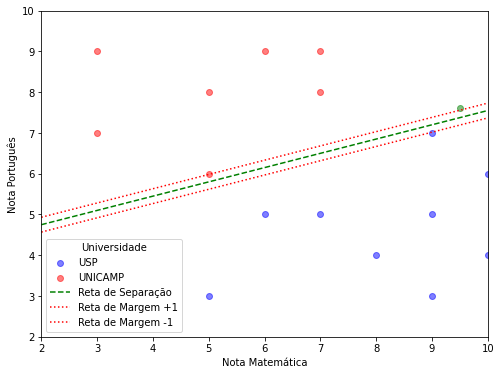

In [13]:
plt.figure(figsize=(8, 6))

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# ax+by-c = 0, wx-c=0 com w= (a, b)
b = 5.5
a = -1.925
c = 22.275

#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# ax+by-c = 1
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# ax+by-c = -1
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')

#Ponto verde adicional, para exemplificar
plt.scatter([9.5], [7.6], color='green', alpha=0.5)

# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()



---



### ❗Exercício 2 ❗

A distância entre dois hiperplanos (retas) definidos por $\vec{w}^T\vec{x}-c=1$ e $\vec{w}^T\vec{x}-c=-1$ pode ser calculado como
$$
d(\vec{w}) = \frac{2}{\|\vec{w}\|},
$$
onde $\|\vec{w}\|^2=\vec{w}^T\vec{w}=\sum_{i=1}^{p}w_i^2$  é a norma 2 ao quadrado dos coeficientes que definem o hiperplano (reta).

No nosso exemplo no plano, temos $\vec{w}=(a,b)$, $\vec{x}=(x,y)$ e as retas
$$
ax+by-c=\pm 1.
$$
1. Verifique (demonstre) que no caso do plano realmente podemos calcular a distância entre as retas como $\frac{2}{\|(a,b)\|}$. Dica: as retas são paralelas e o vetor $\vec{w}$ é normal às retas!!
2. Faça um código que calcule a distância entre as retas. Calcule as distâncias entre as retas nos dois exemplos anteriores e confirme que o segundo exemplo tem margem maior que o primeiro.
3. Varie os valores de $a$, $b$ e $c$ e tente buscar algum caso onde a distância entre as retas aumenta e ainda conseguimos separar os dois grupos. É possível achar um hiperplano de separação mais "largo" que o ilustrado acima?

In [14]:
# Coloque seu código aqui

def distancia_retas(a, b):

    distance = 2 / la.norm([a,b])
    print('distance: ', distance)
    
    return distance

# Exemplo 01
distancia_retas(-2.8, 3.5)

# Exemplo 02
distancia_retas(-1.6, 2)

distance:  0.44621074825316015
distance:  0.7808688094430303


0.7808688094430303

1. Verifique (demonstre) que no caso do plano realmente podemos calcular a distância entre as retas como $\frac{2}{\|(a,b)\|}$.

Dadas as equações das retas: $ax+by-c=\pm 1$
Podemos reescrevê-las na forma geral da equação da reta: $y = \frac{-ax + c \pm 1}{b}$

Considerando os vetores diretores para as retas como: $\vec{v_1} = \begin{pmatrix} 1 \ \frac{-a}{b} \end{pmatrix}$ e $\vec{v_2} = \begin{pmatrix} 1 \ \frac{-a}{b} \end{pmatrix}$

Como as retas são paralelas, podemos escolher qualquer um deles para assumir $\vec{w}$.

Como $\vec{w}$ é perpendicular a $\vec{v_1}$, o produto escalar entre os dois deve ser igual a zero:

$$
\vec{w} * \vec{v_1} = \begin{bmatrix}  a_w \ b_w \end{bmatrix} * \begin{bmatrix}  1 \ \frac{-a_v}{b_v} \end{bmatrix} = a_w - a_v = 0 
$$

Como essa condição é verdadeira para $a_w = a_v$, podemos escolher $\vec{w}$ como $\vec{w} = \begin{pmatrix} a \ b \end{pmatrix}$.

Agora, podemos calcular a distância entre as duas retas usando a fórmula fornecida: 
$$
d(\vec{w}) = \frac{2}{\|\vec{w}\|} \rightarrow \|\vec{w}\|^2 = \vec{w}^T\vec{w} = \begin{pmatrix}  a \ b \end{pmatrix} \begin{bmatrix}  a \ b \end{bmatrix} = a^2 + b^2
$$

Então, 
$$
d(\vec{w}) = \frac{2}{\sqrt{a^2+b^2}} = \frac{2}{\|(a,b)\|}
$$

2. Código com cálculos para os dois exemplos na célula acima.

3. Podemos variar os valores de a e b arbitrariamente, a fim de achar um hiperplano mais "largo". O valor de c não afeta a distância entre os hiperplanos, mas sim a separação entre os grupos.

Na célula abaixo, é feito o cálculo com um valor maior de distância entre os hiperplanos, e que respeita a separação entre os dois grupos.
O valor foi "chutado", assim como nas células anteriores.

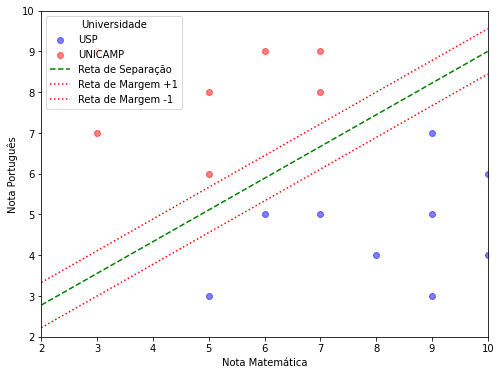

distance:  0.44621074825316015
distance:  0.7808688094430303
distance:  0.8770580193070292


0.8770580193070292

In [15]:
plt.figure(figsize=(8, 6))

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# ax+by-c = 0
# wx - c = 0, w =(a,b)
b = 1.8
a = -1.4
c = 2.2

#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# ax+by-c = 1
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# ax+by-c = -1
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()

distancia_retas(-2.8, 3.5)
distancia_retas(-1.6, 2)
distancia_retas(a, b)



---



## Support Vector Machine

O algoritmo de Support Vector Machine (SVM) é um método usado em machine learning proposto na decada de 1990 para fazer classificação superviosionada de dados. O método é supervisionado por precisar de um treinamento com uma base de dados para depois poder ser usado para classificar novos dados.

O método geral tem muitos detalhes técnicos, então aqui vamos discutir alguns casos mais específicos, com algumas suposições (depois vamos tentar relaxar algumas dessas hipóteses):

- Para a construção do modelo (treinamento), assumimos dados $\vec{x}_1,\dots,\vec{x}_n$, com $\vec{x}_n \in \mathbb{R}^p$, com respectivas classificações $y_1, y_2,...y_n$, que para simplificar, vamos assumir $y_i=\pm1$.
- Vamos supor que existe um hiperplano ${w}^T{x}-c=0$ em $\mathbb{R}^p$ que separa os dados $\vec{x}_1,\dots,\vec{x}_n$. Isto é, os dados $\vec{x}_i$ que possuem a classificação $y_i=1$ ficam de um dos lados do hiperplano enquanto os dados que possuem a classificação $y_i=-1$ ficam do outro lado.
- Vamos supor, sem perda de generalidade, que todos os pontos que estão "do lado de cima" do hiperplano, isto é, os $\vec{x}_i$ com $w^T\vec{x}_i-c>0$ são tais que $w^T\vec{x}_i-c\geq1$ (por que podemos fazer esta suposição sem perda de generalidade?). Do mesmo modo, os pontos que estão "do lado de baixo" do hiperplano são todos tais que $w^T\vec{x}_i-c\leq-1$. Sem perda de generalidade vamos supor que os vetores "do lado de cima" estão classificados com $y_i=+1$ e os do lado de baixo por $y_i=-1$.

Um bom classificador é aquele em que esta região que não possui dados, isto é, a região compreendida entre os hiperplano $w^Tx-c=1$ e $w^Tx-c=-1$ é a maior possível. Utilizando a fórmula de distância entre dois (hiper)planos encontramos que esta distância é dada por:
$$\frac{2}{\sqrt{w^Tw}}.$$

Nosso problema de otimização é, dentre todos os hiperplanos $w^Tx-c=0$ que classificam corretamente os dados nas condições descritas acima, encontrar aquele que maximiza a quantidade $\frac{2}{\sqrt{w^Tw}}$. Convença-se que, de forma equivalente, podemos minimizar $\frac{w^Tw}{2}$. Ou seja, o problema de interesse pode ser escrito como:

>\begin{array}{ll}
\mbox{Minimizar}_{w\in\mathbb{R}^p, c\in\mathbb{R}}&\frac{1}{2}w^Tw,\\
\mbox{tal que}&y_i(w^T\vec{x}_i-c)\geq1, i=1,\dots,n.
\end{array}


Ou seja, isto é o mesmo que dizer que quando $y_i=1$, o ponto $\vec{x}_i$ tem que estar bem classificado acima do hiperplano ($w^T\vec{x}_i-c\geq1$) e quando $y_i=-1$ o ponto $\vec{x}_i$ tem que estar bem classificado abaixo do hiperplano ($w^T\vec{x}_i-c\leq-1$).

Este é um problema de otimização quadrática convexa. A função objetivo a ser minimizada é uma função quadrática e convexa e as restrições são dadas por funções lineares das variáveis $w$ e $c$. Este tipo de problema pode ser resolvido por uma variação do método de Newton que veremos abaixo.

Mais detalhes sobre SVMs podem ser encontrados aqui:
- https://alex.smola.org/papers/2004/SmoSch04.pdf
---



#### Minimização com Método de Newton

Vamos relembrar o que sabemos dos cursos de cálculo a respeito do problema de minimizar uma função objetivo $f(z), z\in\mathbb{R}^N$ com restrições $h_1(z)=0, \dots, h_m(z)=0$. Sob certas condições de regularidade e diferenciabilidade das funções, sabemos que em uma solução $z^*$ deste problema o gradiente da função objetivo $f$ em $z^*$ é uma combinação linear dos gradientes das restrições em $z^*$. Isto é, existem os chamados multiplicadores de Lagrange $\lambda_1, \dots, \lambda_m\in\mathbb{R}$ tais que
$$\nabla f(z^*)+\sum_{i=1}^m\lambda_i\nabla h_i(z^*)=0.$$

Quando não há restrição alguma no problema, esta condição se reduz a $\nabla f(z^*)=0$. Quando tratamos de restrições de desigualdade, digamos, o problema de minimizar uma função $f(z), z\in\mathbb{R}^N$, restrito a que algumas componentes de $z$ sejam não negativas, isto é, $z_i\geq0, i\in S$, onde $S\subseteq\{1,\dots,N\}$, pode-se mostrar que em uma solução $z^*$, a componente $i$ do gradiente de $f$ em $z^*$ deve ser não-negativa quando $i\in S$ e $z_i^*=0$, devendo se anular nos demais índices.

Por exemplo, o problema de minimizar a função $f(z)=(z+1)^2$ restrita a $z\geq0$ tem $z^*=0$ como solução, e vale que a derivada $f'(z^*)=2\geq0$, enquanto a função $f(z)=(z-1)^2$ restrita a $z\geq0$ tem $z^*=1$ como solução e derivada $f'(z^*)=0$.

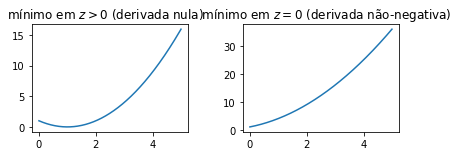

In [16]:
t = np.arange(0.0, 5.0, 0.01)

plt.figure()

plt.subplot(221)
s = (t-1)*(t-1)

plt.plot(t, s)
plt.title('mínimo em $z>0$ (derivada nula)   ')

plt.subplot(222)
s = (t+1)*(t+1)

plt.plot(t, s)
plt.title('   mínimo em $z=0$ (derivada não-negativa)')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

Então, em geral, podemos dizer que para o problema de minimizar $f(z), z\in\mathbb{R}^N$ com a restrição que $z_i\geq0$ para $i\in S\subseteq\{1,\dots,N\}$, se $z^*$ é uma solução então vale que $\nabla f(z^*)=\mu$, onde $\mu_i\geq0, i=1,\dots,N$ com $\mu_i=0$ se $i\not\in S$ e $\mu_iz^*_i=0$, $i\in S$. Isto é, em $S$, $\mu_i$ deve ser forçado em zero apenas quando $z_i^*>0$, e no caso em que $z_i^*=0$, não deve haver restrição adicional além de $\mu_i\geq0$.

Combinando as duas ideias, considerando o problema:

\begin{array}{lll}
\mbox{Minimizar}&f(z),&\\
\mbox{tal que}&h_i(z)=0,& i=1,\dots,m,\\
& z_i\geq0,& i\in S\subseteq\{1,\dots,N\},
\end{array}

pode-se mostrar que, sob certas condições, em uma solução $z^*$ devem existir multiplicadores de Lagrange $\lambda_1\in\mathbb{R},\dots,\lambda_m\in\mathbb{R}$ e $\mu\in\mathbb{R}^N$ tais que (condições de Lagrange):

\begin{eqnarray*}
h_i(z^*)=0, & \, i=1,\dots,m,\\
z_i^*\geq0, & i\in S,\\
\nabla f(z^*)+\sum_{i=1}^m\lambda_i\nabla h_i(z^*)=\mu, & \mu\geq0,\\
\mu_i=0, &i\not\in S,\\
\mu_iz^*_i=0, & i\in S.
\end{eqnarray*}

A notação $\mu\geq0$ ($\mu>0$) significa que todas as componentes de $\mu$ são $\geq0$ ($>0$). De volta ao nosso problema de classificação, vamos descrevê-lo da seguinte forma:

\begin{array}{ll}
\mbox{Minimizar}_{w\in\mathbb{R}^p, c\in\mathbb{R}, s\in\mathbb{R}^n}&\frac{1}{2}w^Tw,\\
\mbox{tal que}&y_i(w^T\vec{x}_i-c)-s_i=1, i=1,\dots,n,\\
&s_i\geq0, i=1,\dots,n.
\end{array}

Aqui simplesmente enxergamos cada desigualdade $g(z)\geq1$ através de uma variável de folga $s$ impondo $g(z)-s=1$ e $s\geq0$, o que descreve o problema de forma equivalente.

Neste caso, como as restrições são lineares nas variáveis (note que, no nosso problema, temos $z=(w,c,s)\in\mathbb{R}^p\times\mathbb{R}\times\mathbb{R}^n$), e a função objetivo é uma quadrática convexa, é conhecido que as condições de Lagrange descritas acima são necessárias e suficientes para que $z^*$ seja uma solução do problema.

Para descrever o sistema de Lagrange, vamos utilizar as expressões descritas acima com $f(w,c,s)=\frac{1}{2}w^Tw$ e $h_i(w,c,s)=y_i(w^T\vec{x}_i-c)-s_i-1, i=1,\dots,n$, considerando que das variáveis $(w,c,s)$, apenas $s$ tem as restrições de sinal $s_i\geq0, i=1,\dots,n$. A parte central das condições de Lagrange consiste nas equações:
$$\left(\begin{array}{c}\nabla_w f(w,c,s)\\ \nabla_c f(w,c,s)\\ \nabla_s f(w,c,s)\end{array}\right)+\sum_{i=1}^n\lambda_i\left(\begin{array}{c}\nabla_w h_i(w,c,s)\\ \nabla_c h_i(w,c,s)\\ \nabla_s h_i(w,c,s)\end{array}\right)=\left(\begin{array}{c}0\\ 0\\ \mu\end{array}\right).$$

Note que um multiplicador $\mu\geq0$ deve aparecer no lado direito apenas associado com as variáveis que estão sujeitas à restrição de sinal, ou seja, $s$. Para as demais variáveis o valor resultante deve ser zero, conforme explicado anteriormente.

Calculando as derivadas e complementando com as demais restrições, montamos o nosso sistema não linear de Lagrange conforme abaixo:

\begin{array}{c}
\mbox{viabilidade primal:}\\
(1)\quad y_i(w^T\vec{x}_i-c)-s_i-1=0, i=1,\dots,n,\\
s_i\geq0, i=1,\dots,n,\\[0.5cm]
\mbox{derivada com respeito a $w$:}\\
(2)\quad w+\sum_{i=1}^n\lambda_iy_i\vec{x}_i=0,\\[0.5cm]
\mbox{derivada com respeito a $c$:}\\
(3)\quad -\sum_{i=1}^n\lambda_iy_i=0\\[0.5cm]
\mbox{derivada com respeito a $s$ (igual a $\mu$):}\\
(4)\quad -\lambda_j-\mu_j=0, j=1,\dots,n,\\[0.5cm]
\mbox{viabilidade dual:}\\
\mu_j\geq0, j=1,\dots,n,\\[0.5cm]
\mbox{complementaridade:}\\
(5)\quad\mu_js_j-r=0, j=1,\dots,n, \mbox{com } r=0.
\end{array}


Note que a única não linearidade deste sistema consiste na restrição de complementaridade $\mu_js_j=0$. Esta restrição dá um sabor "combinatório" ao problema já que ela apenas diz que uma ou outra variável deve se anular. Esta restrição traz algumas dificuldades para a aplicação direta do método de Newton e por isso aliviamos este aspecto ao incorporar o parâmetro $r>0$, transformando a equação em $\mu_js_j-r=0$. A ideia é reduzir $r$ gradativamente para zero após cada iteração de Newton mantendo as variáveis $\mu_j$ e $s_j$ estritamente positivas (ou seja, "interiores"). Isto funciona melhor na prática do que aplicar Newton diretamente e está associado a uma teoria rica dos chamados métodos de pontos interiores. Em particular, pode-se provar que o número de iterações necessárias para encontrar uma solução com precisão $\varepsilon>0$ é da ordem de $\sqrt{n}\log\left(\frac{1}{\varepsilon}\right)$.


Sendo mais específico, vamos aplicar o método de Newton a este sistema de equações (e inequações) usando a estratégia dos conhecidos **Métodos de Pontos interiores** para minimizar funções com restrições, da seguinte forma:

1. Primeiro, tomamos um chute inicial $w_0\in\mathbb{R}^p$, $c_0\in\mathbb{R}$ e $0<s_0\in\mathbb{R}^n$ para as variáveis primais e $\lambda_0\in\mathbb{R}^n$,$0<\mu_0\in\mathbb{R}^n$ para as variáveis duais.
2. O valor $r$ inicial será considerado como um parâmetro e será inicializado como $r=\frac{\mu_0^Ts_0}{n}>0$, que será reduzido após cada iteração de Newton ($r:=\gamma r$, para algum $0<\gamma<1$).
3. Dada uma aproximação $z_k\in\mathbb{R}^N$ para a solução do sistema não linear $F(z)=0\in\mathbb{R}^N$, as iterações do método de Newton consistem em resolver o sistema linear $F'(z^k)d=-F(z^k)$, onde $F'(z^k)$ é a matriz Jacobiana de $F$ em $z^k$, e em seguida atualizar $z^{k+1}=z^k+d$. No nosso problema, as variáveis são $z^k=(w^k,c^k,s^k,\lambda^k,\mu^k)$. Da mesma forma, $d=(d_w,d_c,d_s,d_\lambda,d_\mu)$.
4. Precisamos nos lembrar das restrições de desigualdade $\mu\geq0$ e $s\geq0$. Para isso, vamos corrigir a atualização das variáveis utilizando a expressão $z^{k+1}=z^k+td$ para algum $t>0$ que garanta $s^{k+1}>0$ e $\mu^{k+1}>0$. Para isso, vamos tomar $t$ como sendo o maior número tal que $s^k+td_s\geq0$ e $\mu^k+td_\mu\geq0$. A atualização é feita então com $z^{k+1}=z^k+0.99td$.

Escrevendo o sistema de Newton para o nosso problema, temos as equações abaixo:

$$
\mbox{derivada de (1)}\\
\left(\begin{array}{cccc}\begin{array}{cc}y_1\vec{x}_1^T&-y_1\\ \vdots&\vdots\\ y_n\vec{x}_n^T&-y_n\\\end{array}&-I&0&0\end{array}\right)\left(\begin{array}{c}d_w\\d_c\\d_s\\d_\lambda\\d_\mu\end{array}\right)=\left(\begin{array}{c}-y_1(w^T\vec{x}_1-c)+s_1+1\\ \vdots\\-y_n(w^T\vec{x}_n-c)+s_n+1\end{array}\right)$$

$$
\mbox{derivada de (2) e (3)}\\
\left(\begin{array}{ccccccc}I&0&0&y_1\vec{x}_1&\dots&y_n\vec{x}_n&0\\
0&0&0&-y_1&\dots&-y_n&0\end{array}\right)\left(\begin{array}{c}d_w\\d_c\\d_s\\d_{\lambda_1}\\ \vdots\\ d_{\lambda_n}\\d_\mu\end{array}\right)=\left(\begin{array}{c}-w-\sum_{i=1}^n\lambda_iy_i\vec{x}_i\\ \sum_{i=1}^n\lambda_iy_i\end{array}\right)
$$

$$
\mbox{derivada de (4)}\\
\left(\begin{array}{ccccc}0&0&0&-I&-I\end{array}\right)\left(\begin{array}{c}d_w\\d_c\\d_s\\d_{\lambda}\\d_\mu\end{array}\right)=\lambda+\mu$$

$$
\mbox{derivada de (5)}\\
\left(\begin{array}{ccccc}0&0&\left[\begin{array}{ccc}\mu_1&&\\
&\ddots&\\
&&\mu_n\end{array}\right]&0&\left[\begin{array}{ccc}s_1&&\\
&\ddots&\\
&&s_n\end{array}\right]\end{array}\right)\left(\begin{array}{c}d_w\\d_c\\d_s\\d_\lambda\\d_\mu\end{array}\right)=\left(\begin{array}{c}-\mu_1s_1+r\\ \vdots\\ -\mu_ns_n+r\end{array}\right)$$

Note que este é um sistema linear com $3n+p+1$ equações e $3n+p+1$ variáveis. Matricialmente, temos

$$
\left(\begin{array}{c}YX&-y&-I&0&0\\
I&0&0&X^TY^T&0\\
0&0&0&-y^T&0\\
0&0&0&-I&-I\\
0&0&M&0&S\end{array}\right)
\left(\begin{array}{c}d_w\\d_c\\d_s\\d_\lambda\\d_\mu\end{array}\right)=
\left(\begin{array}{c}-YXw+y^Tec+s+e\\-w-\lambda^T X^TY^T\\
\lambda^Ty\\
\lambda+\mu\\
-\mu^Ts+r\end{array}\right),
$$

onde $e$ é o vetor de um's, $X$ é a matrix $n\times p$ onde cada linha é um ponto $\vec{x}_i$ da amostra, $Y$ é a matriz diagonal com o vetor $y$ na diagonal, $M$ é a matriz diagonal com o vetor $\mu$ na diagonal e $S$ é a matriz diagonal com o vetor $s$ na diagonal.

Referência:
- https://www.maths.ed.ac.uk/~gondzio/reports/ipmXXV.pdf

#### Nossa Implementação

In [17]:
def F(X, y, w, c, lam, mu, s, r):
  # Recebe:
  # X - matrix (n x p) com cada linha uma amostra/ponto diferente (x_i), e cada ponto tendo dimensão "p".
  # y - vetor (n x 1) com classificação dos pontos +-1 para cada ponto
  # w - vetor (p x 1) com os pesos para a equação do hiperplano
  # c - constante do hiperplano
  # lam - vetor (n x 1) dos multiplicadores de Lagrange (variável auxiliar)
  # mu  - vetor (n x 1) multiplicadores (variável auxiliar)
  # s - vetor (n x 1) vetor de variáveis de folga (variável auxiliar)
  # r - escalar auxiliar
  #
  # Devolve o vetor da função F(z) que queremos achar o zero.
  # Observação z=[w,c,s,lam,mu]
  #  Vetor  : F(z)

  #Matriz de dados
  n, p = X.shape

  y = y.reshape(n,1)

  yr = np.repeat( y, p, axis=1 )
  YX = np.multiply(yr, X)

  lamYXt = np.dot(lam.T, YX).T
  wtX = np.dot(w.T, X.T).reshape(n,1)
  lamy = np.dot(lam.T, y).reshape(1, 1)

  # F(z)
  Fz = np.block([
    [y*(wtX-c)-s-1],
    [w+lamYXt],
    [-lamy],
    [-lam-mu],
    [mu*s-r]
  ])

  # Retorna o valor da função que queremos achar o zero.
  return Fz

In [18]:
def sistema_newton(X, y, w, c, lam, mu, s, r):
  # Recebe:
  # X - matrix (n x p) com cada linha uma amostra/ponto diferente (x_i), e cada ponto tendo dimensão "p".
  # y - vetor (n x 1) com classificação dos pontos +-1 para cada ponto
  # w - vetor (p x 1) com os pesos para a equação do hiperplano
  # c - constante do hiperplano
  # lam - vetor (n x 1) dos multiplicadores de Lagrange (variável auxiliar)
  # mu  - vetor (n x 1) multiplicadores (variável auxiliar)
  # s - vetor (n x 1) vetor de variáveis de folga (variável auxiliar)
  # r - escalar auxiliar
  #
  # Devolve Solução do sistema do método de Newton com direções na ordem
  # [dw,
  #  dc,
  #  ds,
  #  dlam,
  #  dmu]

  # Observação z=[w,c,s,lam,mu]
  #  Matriz : F'(z)
  #  Vetor  : F(z)
  # onde F' é a Jacobiana do problema de Newton e F é a função que queremos encontrar o zero.
  # O sistema linear resolvido é F'(z) d = - F(z)

  #Montar a matrix para o método de Newton
  n, p = X.shape

  y = y.reshape(n,1)

  yr = np.repeat( y, p, axis=1 )
  YX = np.multiply(yr, X)

  Onxn = np.zeros((n,n))
  Opxn = np.zeros((p,n))
  Onxp = np.zeros((n,p))
  Opx1 = np.zeros((p,1))
  O1xp = np.zeros((1,p))
  O1xn = np.zeros((1,n))
  Onx1 = np.zeros((n,1))
  Inxn = np.eye(n)
  Ipxp = np.eye(p)
  M = np.diag(mu.reshape(n))
  S = np.diag(s.reshape(n))

  #Matrix
  A=np.block([
      [YX,  -y,   -Inxn,   Onxn,   Onxn],
      [Ipxp, Opx1, Opxn,   YX.T,   Opxn],
      [O1xp, 0,    O1xn,   -y.T,   O1xn],
      [Onxp, Onx1, Onxn,  -Inxn,  -Inxn],
      [Onxp, Onx1,    M,   Onxn,   S   ]
      ])


  #Resolve sistema linear usando Numpy
  z = np.linalg.solve(A, -F(X, y, w, c, lam, mu, s, r))

  dw = z[:p]
  dc = z[p]
  ds = z[p+1:p+1+n]
  dlam = z[p+1+n:p+1+2*n]
  dmu = z[p+1+2*n:p+1+3*n]

  # Retorna solução do sistema linear (incremento do passo de Newton)
  return dw, dc, ds, dlam, dmu

In [19]:
# Método de pontos interiores

def pontos_interiores_SVM(X, y, tolresid = 1e-12, itmax = 1000):
  #
  # Recebe:
  #  X : matriz nxp de dados
  #  y : vetor nx1 de classificações +-1
  #
  #  Opcionais:
  #  tolresid : critério de parada (tolerância do resíduo - valor de ||F(z)||)
  #  itmax    : máximo de iterações
  #
  # Retorna:
  #  w  : vetor de definição do hiperplano
  #  c  : constante associada ao hiperplano de separação
  #

  #Inicialização - dimensões
  n, p = X.shape

  #Chute inicial para hiperplano (zero)
  w = np.zeros(p).reshape(p,1)
  c = 0

  # Chute inicial das variáveis auxiliares

  # Vetor de folga
  s = np.ones(n).reshape(n,1)

  #Multiplicadores
  mu = np.ones(n).reshape(n,1)
  lam = np.zeros(n).reshape(n,1)

  # Parâmetro inicial de controle da complementaridade
  r = np.matmul(s.T,mu)/n


  # Loop principal do Método

  #Iteração
  resid = 1
  it = 0
  while (resid>tolresid) and (it<itmax):
    it=it+1

    # Resolver o sistema linear de Newton
    dw, dc, ds, dlam, dmu = sistema_newton(X, y, w, c, lam, mu, s, r)

    # Imposição das restrições de desigualdades em s e mu
    t_s = 1.0
    if np.any(ds<0):
      t_s = 0.99*np.min(-s[ds<0]/ds[ds<0])
    t_mu = 1.0
    if np.any(dmu<0):
      t_mu = 0.99*np.min(-mu[dmu<0]/dmu[dmu<0])
    t = np.min([t_s, t_mu])

    # Atualizar as variáveis
    w=w+t*dw
    c=c+t*dc
    s=s+t*ds
    lam=lam+t*dlam
    mu=mu+t*dmu

    # Atualizar o parâmetro r
    r=0.2*r

    #Cálculo do resíduo no sistema original (com r=0)
    resid = np.linalg.norm(F(X, y, w, c, lam, mu, s, 0))

    print()
    print("Iteração: ",  it, " Resíduo:", resid)
    print("  Hiperplano w:", w.T," c:", c)

  print()
  print("Solução final. Hiperplano w:", w.T," c:", c)
  return w, c


Vamos testar o código com os nossos dados, mas primeiro vamos colocar eles no formato que discutimos na parte do método de pontos interiores, com a matriz X e o vetor y.

In [20]:
dados = {
    'aluno': ['João', 'José', 'Maria', 'Rosa', 'Pedro', 'Carlos', 'Daniel', 'Mario', 'Ronaldo', 'André', 'Gabriel', 'Nelson', 'Cláudia', 'Fábio', 'Cláudio', 'Armando'],
    'univ': ['USP', 'USP', 'UNICAMP', 'USP', 'UNICAMP', 'UNICAMP', 'USP', 'UNICAMP', 'USP', 'USP', 'UNICAMP', 'USP', 'USP', 'UNICAMP', 'USP', 'UNICAMP'],
    'nota_mat': [9, 10, 7, 10, 3, 6, 9, 7, 7, 5, 3, 8, 9, 5, 6, 5],
    'nota_port': [7, 6, 8, 4, 7, 9, 5, 9, 5, 3, 9, 4, 3, 6, 5, 8]
}


df = pd.DataFrame(dados)
x1 = np.array(df['nota_mat'].values)
x2 = np.array(df['nota_port'].values)

# Transformar nomes das universidade em números +-1
df.loc[df["univ"] == "USP", "univ_num"] = -1
df.loc[df["univ"] == "UNICAMP", "univ_num"] = +1
y = np.array(df['univ_num'].values)

# Matriz X
X = np.array((x1, x2)).transpose()
n, p = X.shape

# Vetor de classificação y
y = y.reshape(n,1)



In [21]:
# Teste do método de pontos interiores
w, c = pontos_interiores_SVM(X, y)


Iteração:  1  Resíduo: 6.322017587177626
  Hiperplano w: [[-0.21667768  0.37106182]]  c: [0.94514866]

Iteração:  2  Resíduo: 2.5762050105076666
  Hiperplano w: [[-0.52655034  0.73392148]]  c: [1.21005047]

Iteração:  3  Resíduo: 0.6546262075490502
  Hiperplano w: [[-0.79095955  1.02687821]]  c: [1.3019389]

Iteração:  4  Resíduo: 0.09563623050346784
  Hiperplano w: [[-0.89057142  1.12969923]]  c: [1.31700526]

Iteração:  5  Resíduo: 0.0114842223023001
  Hiperplano w: [[-0.94854718  1.0603224 ]]  c: [0.6150318]

Iteração:  6  Resíduo: 0.002097335717721416
  Hiperplano w: [[-0.97067546  1.02976207]]  c: [0.32497642]

Iteração:  7  Resíduo: 0.0003223145541183082
  Hiperplano w: [[-0.98774657  1.01232111]]  c: [0.13516033]

Iteração:  8  Resíduo: 7.779196244041545e-05
  Hiperplano w: [[-0.99440626  1.00561328]]  c: [0.06163856]

Iteração:  9  Resíduo: 1.1909541051436817e-05
  Hiperplano w: [[-0.99762991  1.00237232]]  c: [0.02608323]

Iteração:  10  Resíduo: 2.8002783301678778e-06
  Hipe

Vejamos graficamente como ficou a solução encontrada.

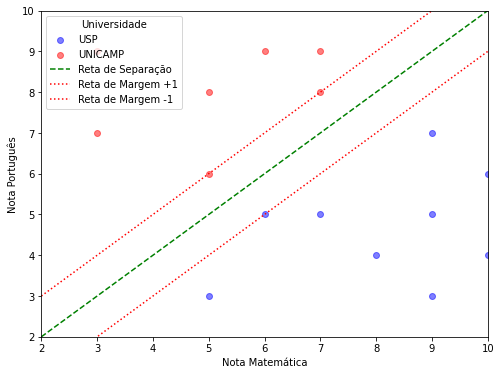

In [22]:
plt.figure(figsize=(8, 6))

# Definir cores com base na variável 'local'
cores = {'USP': 'blue', 'UNICAMP': 'red'}

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# wx - c = 0, com w= (a, b)
a = w[0]
b = w[1]
#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# wx - c = 1,  com w= (a, b)
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# wx - c = -1, com w= (a, b)
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()

> O que achou da solução? Graficamente, parece realmente que é o hiperplano com a maior margem possível. Veja que a margem "toca" alguns pontos (dados), estes pontos são chamados de vetores de suporte (**support vectors**). No nosso exemplo, são os pontos (5,6) ou (7,8) para a margem superior, e o ponto (6,5) para a inferior.



---




No caso em que os dados não podem ser separados, o modelo precisa incorporar erros, ou seja, o classificador deve ser capaz de classificar errado alguns dos pontos dados. Mas isto deve ocorrer apenas quando estritamente necessário. Um modelo que considera esta possibilidade é o seguinte:

\begin{array}{ll}
\mbox{Minimizar}_{w\in\mathbb{R}^p, c\in\mathbb{R}, \varepsilon\in\mathbb{R}^n}&\frac{1}{2}w^Tw+C\sum_{i=1}^n\varepsilon_i,\\
\mbox{tal que}&y_i(w^T\vec{x}_i-c)\geq 1-\varepsilon_i, i=1,\dots,n,\\
&\varepsilon_i\geq0, i=1,\dots,n.
\end{array}
A variável $\varepsilon_i$ permite que o hiperplano classifique errado o dado $\vec{x}_i$, mas o parâmetro $C\gg0$ força que isto aconteça o mínimo possível. Em particular, quando os dados são separáveis, um $C$ grande o suficiente força que todos os $\varepsilon_i$ sejam iguais a zero, recuperando o modelo anterior.

### 🧩 Exercício 🧩

(Opcional)

Implemente um método de pontos interiores que considera o modelo acima. Para tanto, você deve incluir as variáveis $\varepsilon_i$ no sistema não linear de Lagrange, usando as mesmas técnicas ilustradas anteriormente.

Teste o seu código com o exemplo anterior, permitindo que agora pequenos erros sejam aceitáveis, e compare com os resultados anteriores.

In [23]:
# Coloque seu código aqui

Coloque as respostas/deduções/comentários aqui.






---



### Implementação "caixa preta"

O propósito dessa atividade do curso é entendermos como funciona um SVM, analisando uma possível implementação, via otimização usando o método dos pontos interiores. Por outro lado, várias bibliotecas oferecem implmentações de algoritmos de SVM, então vamos ver como uma dessas bibliotecas se sai em comparação com o nosso algortimo.

Usaremos uma biblioteca chamada
- **scikit-learn: Machine Learning in Python**

Ela possui um módulo de SVM, que pode ser chamado via **import sklearn.svm**.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

Vamos usar uma função que resolve o problema de otimização proposto acima chamada **LinearSVC**. A implementação deles sempre leva em conta a "regularização" descrita acima, permitindo pequenos erros de classificação, por isso precisamos definir o parâmetro $C$ como sendo muito grande para imitarmos o nosso algoritmo. Com a função "loss" escolhida como "hinge" o problema resolvido é exatamente o mesmo que apresentamos acima. A diferença é que ele usa um algoritmo que explora melhor a estrutura do problema (em particular, o problema "dual" é resolvido).


Vejamos uma implementação.

In [24]:
from sklearn.svm import LinearSVC

#Dados (os mesmos de antes)
n, p = X.shape
x_train = X
y_train = y.reshape(n)

# Primeiro dizemos que tipo de modelo que queremos (SVM linear)
# Colocamos C bem grande, para que ele não permita erros de classificação
# a função loss é escolhida como 'hinge' para coincidir com o modelo apresentado
model = LinearSVC(loss='hinge',C=1e12, max_iter=10000)

# Agora pedimos para ele ajustar o modelo, ou seja,
#  resolver o problema de otimização e achar o hiperplano
svmfit = model.fit(x_train,y_train)

# Esses são os parâmetros do hiperplano ajustado pelo sklearn
w_sklearn = svmfit.coef_[0]

# **Cuidado**, o nosso c é -c do sklearn!!!
c_sklearn = - svmfit.intercept_

print(" w , c ")
print(w_sklearn, c_sklearn)



 w , c 
[-0.99995676  1.00000577] [0.00028829]


> Veja como o resultado do $w$ e $c$ ficou similar ao nosso! Vejamos graficamente.

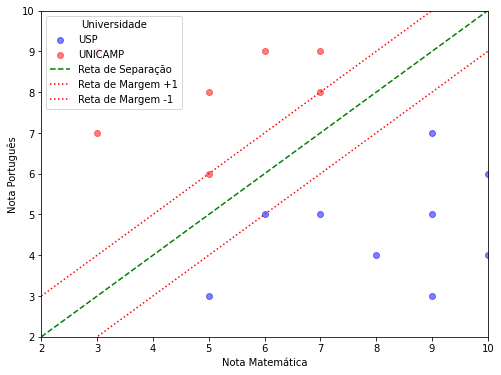

In [25]:
plt.figure(figsize=(8, 6))

# Definir cores com base na variável 'local'
cores = {'USP': 'blue', 'UNICAMP': 'red'}

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# wx - c = 0, com w= (a, b)
a = w_sklearn[0]
b = w_sklearn[1]

#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# wx - c = 1, com w= (a, b)
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# wx - c = -1, com w= (a, b)
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()

### ❗Exercício 3 ❗

Considerando este problema bidimensional de classificação, com esses dados anteriores, faça as seguintes atividades.

1. Verifique o que acontece com o número de iterações do método de pontos interiores quando o parâmetro $r$ é inicializado como zero.

2. Na implementação do método de pontos interiores, reduzimos o parâmetro $r$ em $80\%$ a cada iteração de Newton ($r:=\gamma r$, com $\gamma=0.2$). Estude o comportamento do algoritmo variando o parâmetro $\gamma$. Para isso, faça uma tabela do número de iterações em função de $\gamma$ para algumas escolhas de $\gamma$.

3. Faça um critério de parada mais refinado deixando o algoritmo continuar iterando mesmo quando o critério de parada relativo ao resíduo é atingido. Utilize como critério de parada adicional que a norma da diferença entre duas iterações $\|z^{k+1}-z^k\|$ é menor que $10^{-12}$.

4. A equação (4) define que o vetor $\mu$ é igual a $-\lambda$. Isso significa que podemos reduzir a dimensão do sistema que precisamos resolver, eliminando uma das variáveis $\lambda$ ou $\mu$. Copie os códigos anteriores e ajuste a implementação  do método de pontos interiores eliminando a variável $\lambda$ do problema. Teste o seu método e verifique se a solução coincide com a implementação original.

In [26]:
# Coloque seus códigos aqui

# Item 01

# Redefinindo função do método de pontos interiores com r = 0:

# Método de pontos interiores

def pontos_interiores_SVM_rzero(X, y, tolresid = 1e-12, itmax = 1000):
  #
  # Recebe:
  #  X : matriz nxp de dados
  #  y : vetor nx1 de classificações +-1
  #
  #  Opcionais:
  #  tolresid : critério de parada (tolerância do resíduo - valor de ||F(z)||)
  #  itmax    : máximo de iterações
  #
  # Retorna:
  #  w  : vetor de definição do hiperplano
  #  c  : constante associada ao hiperplano de separação
  #

  #Inicialização - dimensões
  n, p = X.shape

  #Chute inicial para hiperplano (zero)
  w = np.zeros(p).reshape(p,1)
  c = 0

  # Chute inicial das variáveis auxiliares

  # Vetor de folga
  s = np.ones(n).reshape(n,1)

  #Multiplicadores
  mu = np.ones(n).reshape(n,1)
  lam = np.zeros(n).reshape(n,1)

  # Parâmetro inicial de controle da complementaridade
  #   r = np.matmul(s.T,mu)/n
  r = 0


  # Loop principal do Método

  #Iteração
  resid = 1
  it = 0
  while (resid>tolresid) and (it<itmax):
    it=it+1

    # Resolver o sistema linear de Newton
    dw, dc, ds, dlam, dmu = sistema_newton(X, y, w, c, lam, mu, s, r)

    # Imposição das restrições de desigualdades em s e mu
    t_s = 1.0
    if np.any(ds<0):
      t_s = 0.99*np.min(-s[ds<0]/ds[ds<0])
    t_mu = 1.0
    if np.any(dmu<0):
      t_mu = 0.99*np.min(-mu[dmu<0]/dmu[dmu<0])
    t = np.min([t_s, t_mu])

    # Atualizar as variáveis
    w=w+t*dw
    c=c+t*dc
    s=s+t*ds
    lam=lam+t*dlam
    mu=mu+t*dmu

    # Atualizar o parâmetro r
    r=0.2*r

    #Cálculo do resíduo no sistema original (com r=0)
    resid = np.linalg.norm(F(X, y, w, c, lam, mu, s, 0))

    print()
    print("Iteração: ",  it, " Resíduo:", resid)
    print("  Hiperplano w:", w.T," c:", c)

  print()
  print("Solução final. Hiperplano w:", w.T," c:", c)
  return w, c

w, c = pontos_interiores_SVM_rzero(X, y)


Iteração:  1  Resíduo: 4.8642622318770625
  Hiperplano w: [[-0.18056236  0.30921413]]  c: [0.78761355]

Iteração:  2  Resíduo: 3.024901480261169
  Hiperplano w: [[-0.33297461  0.46856671]]  c: [0.78452333]

Iteração:  3  Resíduo: 2.1763893665401364
  Hiperplano w: [[-0.45829829  0.6085888 ]]  c: [0.82674068]

Iteração:  4  Resíduo: 1.0035175247745225
  Hiperplano w: [[-0.66725152  0.88443156]]  c: [1.19446543]

Iteração:  5  Resíduo: 0.6609038064141889
  Hiperplano w: [[-0.75873724  0.94608112]]  c: [1.03036921]

Iteração:  6  Resíduo: 0.3629496484985733
  Hiperplano w: [[-0.85343283  0.98454526]]  c: [0.72110053]

Iteração:  7  Resíduo: 0.12250743688368687
  Hiperplano w: [[-0.93513931  1.01025452]]  c: [0.41312268]

Iteração:  8  Resíduo: 0.019336750575494433
  Hiperplano w: [[-0.97675648  1.01466108]]  c: [0.20847193]

Iteração:  9  Resíduo: 0.0012958127355271049
  Hiperplano w: [[-0.99012676  1.009306  ]]  c: [0.10548556]

Iteração:  10  Resíduo: 6.581963532329186e-05
  Hiperplano

In [27]:
# Item 02

# Replicando a função pontos_interiores_SVM para receber gamma como parâmetro e retornar o numero de iteracoes:

def pontos_interiores_SVM_gamma(X, y, gamma, tolresid = 1e-12, itmax = 1000):
  #
  # Recebe:
  #  X : matriz nxp de dados
  #  y : vetor nx1 de classificações +-1
  #
  #  Opcionais:
  #  tolresid : critério de parada (tolerância do resíduo - valor de ||F(z)||)
  #  itmax    : máximo de iterações
  #
  # Retorna:
  #  w  : vetor de definição do hiperplano
  #  c  : constante associada ao hiperplano de separação
  #

  #Inicialização - dimensões
  n, p = X.shape

  #Chute inicial para hiperplano (zero)
  w = np.zeros(p).reshape(p,1)
  c = 0

  # Chute inicial das variáveis auxiliares

  # Vetor de folga
  s = np.ones(n).reshape(n,1)

  #Multiplicadores
  mu = np.ones(n).reshape(n,1)
  lam = np.zeros(n).reshape(n,1)

  # Parâmetro inicial de controle da complementaridade
  r = np.matmul(s.T,mu)/n


  # Loop principal do Método

  #Iteração
  resid = 1
  it = 0
  while (resid>tolresid) and (it<itmax):
    it=it+1

    # Resolver o sistema linear de Newton
    dw, dc, ds, dlam, dmu = sistema_newton(X, y, w, c, lam, mu, s, r)

    # Imposição das restrições de desigualdades em s e mu
    t_s = 1.0
    if np.any(ds<0):
      t_s = 0.99*np.min(-s[ds<0]/ds[ds<0])
    t_mu = 1.0
    if np.any(dmu<0):
      t_mu = 0.99*np.min(-mu[dmu<0]/dmu[dmu<0])
    t = np.min([t_s, t_mu])

    # Atualizar as variáveis
    w=w+t*dw
    c=c+t*dc
    s=s+t*ds
    lam=lam+t*dlam
    mu=mu+t*dmu

    # Atualizar o parâmetro r
    r=gamma*r

    #Cálculo do resíduo no sistema original (com r=0)
    resid = np.linalg.norm(F(X, y, w, c, lam, mu, s, 0))

    print()
    print("Iteração: ",  it, " Resíduo:", resid)
    print("  Hiperplano w:", w.T," c:", c)

  print()
  print("Solução final. Hiperplano w:", w.T," c:", c)
  return w, c, it


# Iterando com diversos valores de gamma e construindo a tabela:

gamma_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

gamma_df = pd.DataFrame(data={'gamma':gamma_values})

iterations = []

for index, row in gamma_df.iterrows():
  
  w, c, it = pontos_interiores_SVM_gamma(X, y, row['gamma'])
  iterations.append(it)

gamma_df['numero_de_iteracoes'] = iterations

display(gamma_df)


Iteração:  1  Resíduo: 6.322017587177626
  Hiperplano w: [[-0.21667768  0.37106182]]  c: [0.94514866]

Iteração:  2  Resíduo: 2.87624983447524
  Hiperplano w: [[-0.45040598  0.63601799]]  c: [1.08819414]

Iteração:  3  Resíduo: 1.1376085673373881
  Hiperplano w: [[-0.67161409  0.87235521]]  c: [1.10051035]

Iteração:  4  Resíduo: 0.28610469998210003
  Hiperplano w: [[-0.82284873  1.06194243]]  c: [1.3126253]

Iteração:  5  Resíduo: 0.1438766231686986
  Hiperplano w: [[-0.88122947  1.06329239]]  c: [0.99967888]

Iteração:  6  Resíduo: 0.05127488701560532
  Hiperplano w: [[-0.93219151  1.04949967]]  c: [0.64434489]

Iteração:  7  Resíduo: 0.010394864341949823
  Hiperplano w: [[-0.9648534  1.0318699]]  c: [0.36835948]

Iteração:  8  Resíduo: 0.0012445434192333241
  Hiperplano w: [[-0.98182503  1.0178543 ]]  c: [0.19813481]

Iteração:  9  Resíduo: 0.00018812395229482782
  Hiperplano w: [[-0.99054849  1.00943311]]  c: [0.10386408]

Iteração:  10  Resíduo: 4.7546751296860046e-05
  Hiperplan

,gamma,numero_de_iteracoes
0,0.0,24
1,0.1,20
2,0.2,19
3,0.3,25
4,0.4,33
5,0.5,43
6,0.6,58
7,0.7,83
8,0.8,131
9,0.9,277


In [28]:
# Item 03

def pontos_interiores_SVM_novo_criterio(X, y, tolresid = 1e-12, itmax = 1000):
  #
  # Recebe:
  #  X : matriz nxp de dados
  #  y : vetor nx1 de classificações +-1
  #
  #  Opcionais:
  #  tolresid : critério de parada (tolerância do resíduo - valor de ||F(z)||)
  #  itmax    : máximo de iterações
  #
  # Retorna:
  #  w  : vetor de definição do hiperplano
  #  c  : constante associada ao hiperplano de separação
  #

  #Inicialização - dimensões
  n, p = X.shape

  #Chute inicial para hiperplano (zero)
  w = np.zeros(p).reshape(p,1)
  c = 0

  # Chute inicial das variáveis auxiliares

  # Vetor de folga
  s = np.ones(n).reshape(n,1)

  #Multiplicadores
  mu = np.ones(n).reshape(n,1)
  lam = np.zeros(n).reshape(n,1)

  # Parâmetro inicial de controle da complementaridade
  r = np.matmul(s.T,mu)/n


  # Loop principal do Método

  #Iteração
  resid = 1
  it = 0
  norm_w = 1

  while ((resid>tolresid) or (norm_w >= 10e-12)) and (it<itmax):
    
    it=it+1
    
    w_old = w

    # Resolver o sistema linear de Newton
    dw, dc, ds, dlam, dmu = sistema_newton(X, y, w, c, lam, mu, s, r)

    # Imposição das restrições de desigualdades em s e mu
    t_s = 1.0
    if np.any(ds<0):
      t_s = 0.99*np.min(-s[ds<0]/ds[ds<0])
    t_mu = 1.0
    if np.any(dmu<0):
      t_mu = 0.99*np.min(-mu[dmu<0]/dmu[dmu<0])
    t = np.min([t_s, t_mu])

    # Atualizar as variáveis
    w=w+t*dw
    c=c+t*dc
    s=s+t*ds
    lam=lam+t*dlam
    mu=mu+t*dmu

    # Atualizar o parâmetro r
    r=0.2*r

    #Cálculo do resíduo no sistema original (com r=0)
    resid = np.linalg.norm(F(X, y, w, c, lam, mu, s, 0))
    
    #Cálculo do novo critério de parada
    norm_w = np.linalg.norm(np.subtract(w, w_old))

    print()
    print("Iteração: ",  it, " Resíduo 01:", resid, " Novo critério < 10e-12:", norm_w)
    print("  Hiperplano w:", w.T," c:", c)

  print()
  print("Solução final. Hiperplano w:", w.T," c:", c)
  return w, c


w, c = pontos_interiores_SVM_novo_criterio(X, y)


Iteração:  1  Resíduo 01: 6.322017587177626  Novo critério < 10e-12: 0.4296930202691017
  Hiperplano w: [[-0.21667768  0.37106182]]  c: [0.94514866]

Iteração:  2  Resíduo 01: 2.5762050105076666  Novo critério < 10e-12: 0.47716684316106744
  Hiperplano w: [[-0.52655034  0.73392148]]  c: [1.21005047]

Iteração:  3  Resíduo 01: 0.6546262075490502  Novo critério < 10e-12: 0.3946338515641544
  Hiperplano w: [[-0.79095955  1.02687821]]  c: [1.3019389]

Iteração:  4  Resíduo 01: 0.09563623050346784  Novo critério < 10e-12: 0.14315965041837114
  Hiperplano w: [[-0.89057142  1.12969923]]  c: [1.31700526]

Iteração:  5  Resíduo 01: 0.0114842223023001  Novo critério < 10e-12: 0.09041202553966476
  Hiperplano w: [[-0.94854718  1.0603224 ]]  c: [0.6150318]

Iteração:  6  Resíduo 01: 0.002097335717721416  Novo critério < 10e-12: 0.03773054435678461
  Hiperplano w: [[-0.97067546  1.02976207]]  c: [0.32497642]

Iteração:  7  Resíduo 01: 0.0003223145541183082  Novo critério < 10e-12: 0.02440512226722

In [29]:
# Item 04

def F_item_04(X, y, w, c, lam, mu, s, r):
  # Recebe:
  # X - matrix (n x p) com cada linha uma amostra/ponto diferente (x_i), e cada ponto tendo dimensão "p".
  # y - vetor (n x 1) com classificação dos pontos +-1 para cada ponto
  # w - vetor (p x 1) com os pesos para a equação do hiperplano
  # c - constante do hiperplano
  # lam - vetor (n x 1) dos multiplicadores de Lagrange (variável auxiliar)
  # mu  - vetor (n x 1) multiplicadores (variável auxiliar)
  # s - vetor (n x 1) vetor de variáveis de folga (variável auxiliar)
  # r - escalar auxiliar
  #
  # Devolve o vetor da função F(z) que queremos achar o zero.
  # Observação z=[w,c,s,lam,mu]
  #  Vetor  : F(z)

  #Matriz de dados
  n, p = X.shape

  y = y.reshape(n,1)

  yr = np.repeat( y, p, axis=1 )
  YX = np.multiply(yr, X)

  lamYXt = np.dot(lam.T, YX).T
  wtX = np.dot(w.T, X.T).reshape(n,1)
  lamy = np.dot(lam.T, y).reshape(1, 1)

  # F(z)
  Fz = np.block([
    [y*(wtX-c)-s-1],
    [w+lamYXt],
    [-lamy],

    # AQUI!
    # Era: [-lam-mu],
    # Virou:
    [-mu],
    
    [mu*s-r]
  ])

  # Retorna o valor da função que queremos achar o zero.
  return Fz


def sistema_newton_item_04(X, y, w, c, lam, mu, s, r):
  # Recebe:
  # X - matrix (n x p) com cada linha uma amostra/ponto diferente (x_i), e cada ponto tendo dimensão "p".
  # y - vetor (n x 1) com classificação dos pontos +-1 para cada ponto
  # w - vetor (p x 1) com os pesos para a equação do hiperplano
  # c - constante do hiperplano
  # lam - vetor (n x 1) dos multiplicadores de Lagrange (variável auxiliar)
  # mu  - vetor (n x 1) multiplicadores (variável auxiliar)
  # s - vetor (n x 1) vetor de variáveis de folga (variável auxiliar)
  # r - escalar auxiliar
  #
  # Devolve Solução do sistema do método de Newton com direções na ordem
  # [dw,
  #  dc,
  #  ds,
  #  dlam,
  #  dmu]

  # Observação z=[w,c,s,lam,mu]
  #  Matriz : F'(z)
  #  Vetor  : F(z)
  # onde F' é a Jacobiana do problema de Newton e F é a função que queremos encontrar o zero.
  # O sistema linear resolvido é F'(z) d = - F(z)

  #Montar a matrix para o método de Newton
  n, p = X.shape

  y = y.reshape(n,1)

  yr = np.repeat( y, p, axis=1 )
  YX = np.multiply(yr, X)

  Onxn = np.zeros((n,n))
  Opxn = np.zeros((p,n))
  Onxp = np.zeros((n,p))
  Opx1 = np.zeros((p,1))
  O1xp = np.zeros((1,p))
  O1xn = np.zeros((1,n))
  Onx1 = np.zeros((n,1))
  Inxn = np.eye(n)
  Ipxp = np.eye(p)
  M = np.diag(mu.reshape(n))
  S = np.diag(s.reshape(n))

  #Matrix
  A=np.block([
      [YX,  -y,   -Inxn,   Onxn,   Onxn],
      [Ipxp, Opx1, Opxn,   YX.T,   Opxn],
      [O1xp, 0,    O1xn,   -y.T,   O1xn],
      [Onxp, Onx1, Onxn,  -Inxn,  -Inxn],
      [Onxp, Onx1,    M,   Onxn,   S   ]
      ])


  #Resolve sistema linear usando Numpy
  z = np.linalg.solve(A, -F(X, y, w, c, lam, mu, s, r))

  dw = z[:p]
  dc = z[p]
  ds = z[p+1:p+1+n]
  dlam = z[p+1+n:p+1+2*n]
  dmu = z[p+1+2*n:p+1+3*n]

  # Retorna solução do sistema linear (incremento do passo de Newton)
  return dw, dc, ds, dlam, dmu

# Método de pontos interiores

def pontos_interiores_SVM_item_04(X, y, tolresid = 1e-12, itmax = 1000):
  #
  # Recebe:
  #  X : matriz nxp de dados
  #  y : vetor nx1 de classificações +-1
  #
  #  Opcionais:
  #  tolresid : critério de parada (tolerância do resíduo - valor de ||F(z)||)
  #  itmax    : máximo de iterações
  #
  # Retorna:
  #  w  : vetor de definição do hiperplano
  #  c  : constante associada ao hiperplano de separação
  #

  #Inicialização - dimensões
  n, p = X.shape

  #Chute inicial para hiperplano (zero)
  w = np.zeros(p).reshape(p,1)
  c = 0

  # Chute inicial das variáveis auxiliares

  # Vetor de folga
  s = np.ones(n).reshape(n,1)

  #Multiplicadores
  mu = np.ones(n).reshape(n,1)
  lam = np.zeros(n).reshape(n,1)

  # Parâmetro inicial de controle da complementaridade
  r = np.matmul(s.T,mu)/n


  # Loop principal do Método

  #Iteração
  resid = 1
  it = 0
  while (resid>tolresid) and (it<itmax):
    it=it+1

    # Resolver o sistema linear de Newton
    dw, dc, ds, dlam, dmu = sistema_newton_item_04(X, y, w, c, lam, mu, s, r)

    # Imposição das restrições de desigualdades em s e mu
    t_s = 1.0
    if np.any(ds<0):
      t_s = 0.99*np.min(-s[ds<0]/ds[ds<0])
    t_mu = 1.0
    if np.any(dmu<0):
      t_mu = 0.99*np.min(-mu[dmu<0]/dmu[dmu<0])
    t = np.min([t_s, t_mu])

    # Atualizar as variáveis
    w=w+t*dw
    c=c+t*dc
    s=s+t*ds
    lam=lam+t*dlam
    mu=mu+t*dmu

    # Atualizar o parâmetro r
    r=0.2*r

    #Cálculo do resíduo no sistema original (com r=0)
    resid = np.linalg.norm(F_item_04(X, y, w, c, lam, mu, s, 0))

    print()
    print("Iteração: ",  it, " Resíduo:", resid)
    print("  Hiperplano w:", w.T," c:", c)

  print()
  print("Solução final. Hiperplano w:", w.T," c:", c)
  return w, c


In [30]:
w, c = pontos_interiores_SVM_item_04(X, y)


Iteração:  1  Resíduo: 7.010362507340876
  Hiperplano w: [[-0.21667768  0.37106182]]  c: [0.94514866]

Iteração:  2  Resíduo: 4.269726628978982
  Hiperplano w: [[-0.52655034  0.73392148]]  c: [1.21005047]

Iteração:  3  Resíduo: 2.7923578488083036
  Hiperplano w: [[-0.79095955  1.02687821]]  c: [1.3019389]

Iteração:  4  Resíduo: 1.586800587720693
  Hiperplano w: [[-0.89057142  1.12969923]]  c: [1.31700526]

Iteração:  5  Resíduo: 1.3544501668791726
  Hiperplano w: [[-0.94854718  1.0603224 ]]  c: [0.6150318]

Iteração:  6  Resíduo: 1.4003872916825697
  Hiperplano w: [[-0.97067546  1.02976207]]  c: [0.32497642]

Iteração:  7  Resíduo: 1.4095650610567534
  Hiperplano w: [[-0.98774657  1.01232111]]  c: [0.13516033]

Iteração:  8  Resíduo: 1.4121046373072912
  Hiperplano w: [[-0.99440626  1.00561328]]  c: [0.06163856]

Iteração:  9  Resíduo: 1.4133637654719213
  Hiperplano w: [[-0.99762991  1.00237232]]  c: [0.02608323]

Iteração:  10  Resíduo: 1.413845696898508
  Hiperplano w: [[-0.99897

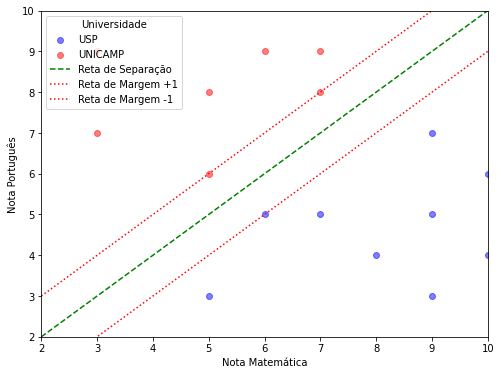

In [31]:
plt.figure(figsize=(8, 6))

# Definir cores com base na variável 'local'
cores = {'USP': 'blue', 'UNICAMP': 'red'}

# Criar o gráfico de dispersão
for local, cor in cores.items():
    plt.scatter(df[df['univ'] == local]['nota_mat'], df[df['univ'] == local]['nota_port'], label=local, color=cor, alpha=0.5)

#Reta
# wx - c = 0, com w= (a, b)
a = w[0]
b = w[1]
#2 pontos da reta principal
x0 = 2
y0 = (c - a*x0)/b
x1 = 10
y1 = (c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='green', linestyle='--', label='Reta de Separação')

#2 pontos da reta de margem
# wx - c = 1,  com w= (a, b)
x0 = 2
y0 = (1+c - a*x0)/b
x1 = 10
y1 = (1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem +1')

#2 pontos da reta de margem
# wx - c = -1, com w= (a, b)
x0 = 2
y0 = (-1+c - a*x0)/b
x1 = 10
y1 = (-1+c - a*x1)/b
plt.plot([x0, x1], [y0, y1], color='red', linestyle=':', label='Reta de Margem -1')


# Adicionar rótulos e título
plt.axis([2, 10, 2, 10])
plt.xlabel('Nota Matemática')
plt.ylabel('Nota Português')
plt.legend(title='Universidade')
plt.show()

Comentários/respostas aqui:

1. Ao utilizar o parâmetro r=0, perdemos o benefício que a redução gradativa desse parâmetro a zero trás para o método de Newton, e a etapa de complementaridade retorna a $\mu_js_j=0$, levando a mais iterações para se chegar a um resultado similar, embora não igual.


2. 

| Gamma | Nº de Iterações |
|:-----:|:---------------:|
|   0   |        24       |
|  0.1  |        20       |
|  0.2  |        19       |
|  0.3  |        25       |
|  0.4  |        33       |
|  0.5  |        43       |
|  0.6  |        58       |
|  0.7  |        83       |
|  0.8  |       131       |
|  0.9  |       277       |
|   1   |       1000      |


3. Código nas células acima. Novo número de iterações: 34.


4. O código está na célula acima. A única mudança realizada foi a modificação da linha [-lam-mu] para [-mu] na função F_item_04, que gera o vetor z.
Embora os valores finais do método sejam diferentes,  os hiperplanos ainda classificam corretamente os dados nas condições descritas acima, como demonstrado na célula com o gráfico.




---



## Trabalhando com textos

Um primeiro desafio de trabalhar com textos é o de como transformar palavras e frases em algo numérico para tratarmos no computador. No que segue vamos discutir uma forma simples de fazer isso, conhecido como "Bag of Words" (BOW), que em português trduzimos como "Saco de Palavras".

Resumidamente, um BOW define uma matriz que relaciona um vocabulário (conjunto de palavras) e conta quantas vezes cada palavra do vocabulário aparece em cada frase, resultando em algo como:




| Frases | azul | branco | brilhar | céu | nuvem | sol |
|--------|------|--------|---------|-----|-------|-----|
|          O céu está azul  |   1   |    0    |    0  |  1   |   0  |  0  |
|  As nuvens estão brancas  |   0   |    1    |    0  |  0   |   1  |  0  |
|     O sol está brilhando  |   0   |    0    |    1  |  0   |   0  |  1  |

Vamos ver como construir uma BOW?


Referências:
- https://www.kaggle.com/code/mehmetlaudatekman/text-classification-svm-explained/notebook
- https://edisciplinas.usp.br/pluginfile.php/6288975/mod_resource/content/0/Aula%209%20-%20NLTK%20e%20spaCy.pdf

### Bag of Words

Começaremos com um conjunto de frases para exemplificar.

In [32]:
frases = [
    "O céu está azul",
    "As nuvens estão brancas",
    "O sol está brilhando",
    "Não há ganho sem dor"
]

Para o **Bag of Words**, precisamos pré-processar as frases para considerar apenas palavras "chaves". Vamos fazer as seguintes "limpezas":
- Remover caracteres que não sejam letras (pontuação). Para isso vamos usar Regular Expression ('re') e simplesmente tirar a pontuação das strings.
- Desconsideramos as palavras de conexão, conhecidas como **stopwords**, que incluem artigos, pronomes, conjunções, etc. Por exemplo: "de", "a", "um", "para". Para fazer isso, vamos usar uma base de stopwords de Português da biblioteca Natural Language Toolkit (NLTK).
- Fazer uma **lematização**, isto é, reduzir a palavra à sua forma canônica, levando em conta sua classe gramatical. Ex: estudar: estudando, estudioso, estudei. Nesta parte usaremos a biblioteca SpaCy (Industrial-Strength Natural Language Processing).

Os primeiros dois passos são bem simples, bastanto consultar bases de dados existentes de português para saber que símbolos e palavras retirar das frase. A parte de Lematização é bem complicada. Para saber mais sobre Lematização e as bibliotecas SpaCy e NLTK, veja o material a seguir:

https://edisciplinas.usp.br/pluginfile.php/6288975/mod_resource/content/0/Aula%209%20-%20NLTK%20e%20spaCy.pdf

In [33]:
# Importar bibliotecas de texto
#-----------------------------------

# Trabalhar com expressões regulares
import re

# Vamos usar a biblioeca NLTK  e a biblioteca spaCy para pre-processar textos

import nltk # Natural Language Toolkit
import spacy # Industrial-Strength Natural Language Processing

#Palavras de junção, como artigos, preposições, pronomes e conjunções
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
swords = nltk.corpus.stopwords.words('portuguese')
swords.remove("não")

# spaCy - baixar modelos de processamento de texto para Português
#    Será usado para a "lematização"
#!python -m spacy download pt_core_news_sm #modelo pequeno
!python -m spacy download pt_core_news_md # médio
nlp = spacy.load("pt_core_news_md")
#!python -m spacy download pt_core_news_lg #Grande

# Contador de texto do SKLEARN - scikit-learn Machine Learning in Python
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joao.wunderlich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joao.wunderlich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: '#'


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#Palavras de conexão / stopwords
print("Stopwords:", swords)

Stopwords: ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem'

In [36]:
# Função que pré-processa frases, considerando:
# - Remover caracteres que não sejam letras (pontuação).
#          Para isso vamos usar Regular Expression ('re') e simplesmente tirar a pontuação das strings.
# - Desconsideramos as palavras de conexão, conhecidas como **stopwords**,
#          que incluem artigos, pronomes, conjunções, etc. Por exemplo: "de", "a", "um", "para".
#          Para fazer isso, vamos usar uma base de stopwords de Português da biblioteca Natural Language Toolkit (NLTK).
# - Fazer uma **lematização**, isto é, reduzir a palavra à sua forma canônica,
#          levando em conta sua classe gramatical. Ex: estudar: estudando, estudioso, estudei.
#          Nesta parte usaremos a biblioteca SpaCy (Industrial-Strength Natural Language Processing).
#

def limpa_frase(frase):

    # Pega apenas letras - inglês
    #text = re.sub("[^a-zA-Z]"," ",frase)

    # Tira pontuação
    text = re.sub(r"[^\w\s]"," ",frase)

    # Tokenizing - Separa cada palavra como um elemento de uma lista
    # converte tudo em minusculo
    text = nltk.word_tokenize(text.lower())

    # Removing stopwords - tira palavras de conexão - swords define a lingua
    text = [word for word in text if word not in swords]

    # Joining - volta para ser uma frase
    text = " ".join(text)

    #Lemmatizing - agrupa palavras por sua raiz - inglês
    #text = [lemma.lemmatize(word) for word in text]

    #Lemmatizing - agrupa palavras por sua raiz - portugues
    doc = nlp(text)
    text = [token.lemma_ for token in doc if not token.is_punct]

    # Joining - volta para ser uma frase
    text = " ".join(text).lower()

    return text

Vamos fazer um teste simples do nosso limpador de frase. Notem como ele mudar as palavras para sua forma "canônica", com base na sua raiz, neste exemplo com "pequenas" virando "pequeno", "coisas" virando "coisa", ...

In [37]:
frase = "As pequenas coisas na vida são as que mais nos trazem felicidade."
print(frase)
print(limpa_frase(frase))

As pequenas coisas na vida são as que mais nos trazem felicidade.
pequeno coisa vida trazer felicidade


Agora vamos passar o limpador em todas as nossas frases.

In [38]:
frases_limpo = []

for frase in frases:
    frases_limpo.append(limpa_frase(frase))

print(frases)
print(frases_limpo)


['O céu está azul', 'As nuvens estão brancas', 'O sol está brilhando', 'Não há ganho sem dor']
['céu azul', 'nuvem branco', 'sol brilhar', 'não ganhar dor']


Quais são as palavras que mais aparecem nas nossas frases? Isso é uma noção de **Vocabulário** usado. Poderíamos fazer um código simples em Python para contar isso, mas ele ficaria lento para rodar em bases grandes. Então vamos usar códigos existentes.

In [39]:
# Inicialize o vetorizador CountVectorizer, para contar palavras
vectorizer = CountVectorizer()

# Alimenta o vetorizador aos dados (construa o vocabulário)
vectorizer.fit(frases_limpo)
vocab = vectorizer.get_feature_names_out()
print("Vocabulário:", vocab)

Vocabulário: ['azul' 'branco' 'brilhar' 'céu' 'dor' 'ganhar' 'nuvem' 'não' 'sol']


Finalmente podemos explicar o que é um Bag of Words!!! Ele é simplesmente uma matriz que cruza nossas frases (linhas) com nosso vocabulário (colunas), indicando quantas vezes cada palavra do vocabulário aparece na frase. Vejamos no exemplo:


In [40]:
#Cria o bag_of_words, cruzando as frases e suas contagens em relação ao vocabulário
bag_of_words = vectorizer.fit_transform(frases_limpo)

# Converta a matriz de bag of words para um DataFrame Pandas
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=vocab)

# Adicione uma coluna para representar as frases
df_bag_of_words['Frases'] = frases

# Reorganize as colunas para ter as frases na primeira coluna
colunas = ['Frases'] + list(vocab)
df_bag_of_words = df_bag_of_words[colunas]

# Imprima a matriz de bag of words
print("Bag of Words:")
print(df_bag_of_words)

Bag of Words:
                    Frases  azul  branco  brilhar  céu  dor  ganhar  nuvem  \
0          O céu está azul     1       0        0    1    0       0      0   
1  As nuvens estão brancas     0       1        0    0    0       0      1   
2     O sol está brilhando     0       0        1    0    0       0      0   
3     Não há ganho sem dor     0       0        0    0    1       1      0   

   não  sol  
0    0    0  
1    0    0  
2    0    1  
3    1    0  




---


**Importante**

Esse método de Bag-of-words é interessante, mas tem algumas limitações, entre elas:

- Note que a matriz gerada ignora a posição da palavra na frase. Então frases distintas podem ter o mesma representação na matriz. Por exemplo,
  - "o mar não está para peixe", e
  - "no mar tem muito peixe",
  - seriam igual em um vocabulário apenas com "mar" e "peixe".
- Ele não leva em conta o contexto e sua conexão com outras palavras da frase. Por exemplo:
  - em "o gato mia, o cachorro late",
  - miar está associado a gato, e latir a cachorro, mas o BOW não será capaz de capturar isso.

- Não leva em conta a frequência que a palavra ocorre em textos.
- Quando usado em um modelo de aprendizado de máquina, ele não consegue achar representação para novas palavras que o seu vocabulário nunca viu.

Por outro lado, trata-se de um método interessante e simples para termos como primeiro método em um curso de métodos numéricos! Ele é a base para entendermos métodos mais sofisticados.



---



### Sentimentos

Agora vamos pensar que cada frase tem a si associado uma emoção, um sentimento. Nesta atividade vamos considerar apenas sentientos positivos (coisas boas) e negativos (coisas ruins). Exemplos de frases:

In [41]:
frases_positivas = [
        "Cada desafio é uma oportunidade.",
    "O amor está em todos os lugares.",
    "A esperança nos mantém.",
    "Um sorriso ilumina o dia.",
    "A gratidão transforma.",
    "Empatia nos conecta.",
    "Paz interior é valiosa.",
    "Persistência leva ao sucesso.",
    "Generosidade enriquece.",
    "Compaixão une corações.",
    "Amizade é um tesouro.",
    "Otimismo ilumina o caminho.",
    "Coragem supera medo.",
    "Humildade nos ensina.",
    "Perdão liberta.",
    "Aceitação traz paz.",
    "Criatividade é expressão pura.",
    "Resiliência nos fortalece.",
    "Fé nos sustenta.",
    "Beleza está em toda parte.",
    "Amor é poderoso.",
    "O Amor é poderoso.",
    "Simplicidade traz felicidade.",
    "Inspiração está ao redor.",
    "Esperança nos eleva.",
    "Alegria contagia.",
    "Gentileza é presente.",
    "Sucesso é autodescoberta.",
    "Harmonia traz equilíbrio.",
    "Inspirar é transformar.",
    "Autoconfiança é vital.",
    "Positividade ilumina.",
    "Fé nos guia.",
    "Resiliência nos levanta.",
    "Abundância é gratidão.",
    "Determinação é poder.",
    "Compreensão une.",
    "Confiança fortalece.",
    "Liberdade é essencial.",
    "Sabedoria é guia.",
    "Imperfeição é bela.",
    "Generosidade nutre.",
    "Autenticidade é vital.",
    "Paixão nos move.",
    "Jornada é felicidade.",
    "Coragem é enfrentar medos.",
    "Alegria está na jornada.",
    "Paciência é virtude.",
    "Gratidão é chave.",
    "Generosidade é conexão.",
    "Autenticidade é essencial.",
    "A vida é cheia de possibilidades emocionantes!",
    "Sempre há algo para apreciar em cada dia.",
    "O amor e a bondade estão ao nosso redor, se prestarmos atenção.",
    "Cada desafio é uma oportunidade para crescer e aprender.",
    "A esperança é a luz que guia nossos corações em tempos difíceis.",
    "O sorriso é a linguagem universal da felicidade.",
    "A gratidão transforma o que temos em suficiente e mais.",
    "A empatia nos conecta uns aos outros em um nível mais profundo.",
    "A paz interior é o verdadeiro tesouro da vida.",
    "A persistência nos leva ao sucesso, passo a passo.",
    "A generosidade nos enriquece mais do que qualquer riqueza material.",
    "A compaixão é o alicerce da verdadeira harmonia entre os seres humanos.",
    "A amizade é um tesouro inestimável que valorizamos ao longo da vida.",
    "O otimismo nos permite ver o mundo com cores mais brilhantes.",
    "A coragem nos ajuda a enfrentar nossos medos mais profundos.",
    "A humildade nos torna receptivos às lições que a vida nos oferece.",
    "O perdão liberta nosso coração do peso do ressentimento.",
    "A aceitação nos permite abraçar a nós mesmos e aos outros com amor incondicional.",
    "A criatividade é a expressão da alma em sua forma mais pura.",
    "A resiliência nos permite superar os momentos mais difíceis da vida.",
    "A fé nos dá força para continuar, mesmo quando tudo parece perdido.",
    "A beleza está em toda parte, se apenas abrirmos os olhos para vê-la.",
    "O amor é a força mais poderosa do universo, capaz de curar todas as feridas.",
    "A simplicidade nos lembra que a verdadeira felicidade reside nas coisas mais simples da vida.",
    "A inspiração está sempre ao nosso redor, se apenas estivermos dispostos a vê-la.",
    "A esperança nos dá asas para voar, mesmo quando estamos cercados por nuvens escuras.",
    "A alegria contagiosa deixa uma marca indelével em todos os corações que toca.",
    "A gentileza é um presente que podemos dar a nós mesmos e aos outros a qualquer momento.",
    "O sucesso é a jornada de autodescoberta que nos leva além de nossos limites autoimpostos.",
    "A harmonia é a sinfonia da vida, onde cada nota contribui para a melodia da existência.",
    "A inspiração é a centelha que acende o fogo da criatividade dentro de nós.",
    "A autoconfiança é o alicerce sobre o qual construímos nossos sonhos mais grandiosos.",
    "A positividade é o elixir da vida que nos mantém radiantes, mesmo nos dias mais sombrios.",
    "A esperança é a estrela-guia que nos guia através das trevas e nos mostra o caminho para a luz.",
    "A paciência é a virtude que nos permite suportar as tempestades da vida com calma e serenidade.",
    "A gratidão é a chave que abre as portas para uma vida cheia de amor e abundância.",
    "A determinação é o motor que nos impulsiona a alcançar as estrelas, mesmo quando todos os outros desistirem."
]

frases_negativas = [
        "Às vezes, a vida parece esmagadora.",
    "Decepções podem abalar nossa confiança.",
    "O medo pode nos paralisar.",
    "Solidão é uma sombra constante.",
    "A tristeza envolve o coração em trevas.",
    "Raiva consome nossos pensamentos.",
    "Ansiedade cria uma prisão mental.",
    "A dor é uma inevitável companheira.",
    "Incerteza gera desconforto.",
    "A culpa é uma âncora pesada.",
    "Dúvida mina nossa confiança.",
    "Arrependimento assombra escolhas passadas.",
    "Preocupação nos consome.",
    "A Preocupação consome.",
    "Inveja envenena o coração.",
    "A amargura corrói de dentro para fora.",
    "Negatividade se espalha como fogo.",
    "Desconfiança quebra relacionamentos.",
    "Decepção abala a confiança.",
    "Desespero nos afunda.",
    "Apatia rouba nossa paixão.",
    "Remorso nos assombra.",
    "Negação evita a realidade.",
    "Solidão é um oceano sem fim.",
    "Confusão nos deixa perdidos.",
    "Mágoa nos fecha.",
    "Insegurança paralisa.",
    "Desconhecido ameaça.",
    "Perda deixa um vazio.",
    "Sobrecarga nos sufoca.",
    "Rotina nos aprisiona.",
    "Ciclo vicioso nos prende.",
    "Ignorância dói.",
    "Mal compreendido nos isola.",
    "Traição nos machuca.",
    "Sufocamento nos esmaga.",
    "Subestimação nos diminui.",
    "Rejeição dói.",
    "Julgamento nos fere.",
    "Abandono nos assusta.",
    "Desapontamento nos entristece.",
    "Exclusão nos isola.",
    "Incompreensão nos confunde.",
    "Ridículo nos envergonha.",
    "Menosprezo nos deprecia.",
    "Subjugação nos oprime.",
    "Engano nos irrita.",
    "Manipulação nos faz sentir impotentes.",
   "Às vezes, a vida pode parecer esmagadora e desanimadora.",
    "As decepções podem nos fazer questionar nosso próprio valor.",
    "O medo pode nos paralisar e impedir de alcançar nossos objetivos.",
    "A solidão pode ser uma companheira sombria nos momentos mais difíceis.",
    "A tristeza pode envolver nosso coração em uma nuvem escura.",
    "A raiva pode consumir nossos pensamentos e nos tornar cegos para o amor ao nosso redor.",
    "A ansiedade pode criar uma prisão em nossa mente, limitando nossa liberdade.",
    "A dor é uma parte inevitável da vida, mas também pode ser uma oportunidade para crescer.",
    "A incerteza pode criar um senso de desconforto e insegurança.",
    "A culpa pode pesar como uma âncora em nossa alma, nos impedindo de seguir em frente.",
    "A dúvida pode minar nossa confiança e nos impedir de alcançar nossos sonhos.",
    "O arrependimento pode nos assombrar, lembrando-nos de escolhas passadas que não podemos desfazer.",
    "A preocupação constante pode nos consumir, roubando-nos a alegria do momento presente.",
    "A inveja pode envenenar nossos corações, nos fazendo desejar o que os outros têm.",
    "A amargura pode nos corroer por dentro, transformando-nos em versões sombrias de nós mesmos.",
    "A negatividade pode se espalhar como uma praga, infectando tudo ao nosso redor.",
    "A desconfiança pode corroer relacionamentos, minando a base da confiança mútua.",
    "A decepção pode nos fazer questionar se podemos confiar em alguém novamente.",
    "O desespero pode nos fazer sentir como se estivéssemos presos em um abismo sem fim.",
    "A apatia pode roubar nossa paixão pela vida, deixando-nos vazios por dentro.",
    "O remorso pode nos perseguir, lembrando-nos de erros passados que gostaríamos de esquecer.",
    "A negação pode nos impedir de enfrentar a realidade, mantendo-nos presos em uma ilusão de segurança.",
    "A solidão pode nos fazer sentir como se estivéssemos perdidos em um mar de rostos desconhecidos.",
    "A confusão pode nos deixar perplexos e incertos sobre qual caminho seguir.",
    "A mágoa pode criar uma barreira entre nós e os outros, nos isolando em nossa própria dor.",
    "A preocupação excessiva pode nos manter acordados à noite, girando em círculos de ansiedade.",
    "A sensação de inadequação pode minar nossa autoconfiança e nos fazer duvidar de nossas habilidades.",
    "A ameaça do desconhecido pode nos deixar paralisados, incapazes de dar o próximo passo.",
    "A perda pode nos deixar sentindo um vazio profundo, como se algo essencial estivesse faltando.",
    "A sensação de ser sobrecarregado pode nos fazer querer desistir antes mesmo de tentar."
]



frases = frases_positivas + frases_negativas

#Lista para sabermos quais frases são positivas (+1) e quais são negativas (-1)
sentimentos = [1]*len(frases_positivas) + [-1]*len(frases_negativas)

In [42]:
# Revisando nossas frases:
for iteracoes in range(len(frases)):
  if sentimentos[iteracoes] > 0:
    sent = "positivo"
  else:
    sent = "negativo"
  print(frases[iteracoes], sentimentos[iteracoes], sent)

Cada desafio é uma oportunidade. 1 positivo
O amor está em todos os lugares. 1 positivo
A esperança nos mantém. 1 positivo
Um sorriso ilumina o dia. 1 positivo
A gratidão transforma. 1 positivo
Empatia nos conecta. 1 positivo
Paz interior é valiosa. 1 positivo
Persistência leva ao sucesso. 1 positivo
Generosidade enriquece. 1 positivo
Compaixão une corações. 1 positivo
Amizade é um tesouro. 1 positivo
Otimismo ilumina o caminho. 1 positivo
Coragem supera medo. 1 positivo
Humildade nos ensina. 1 positivo
Perdão liberta. 1 positivo
Aceitação traz paz. 1 positivo
Criatividade é expressão pura. 1 positivo
Resiliência nos fortalece. 1 positivo
Fé nos sustenta. 1 positivo
Beleza está em toda parte. 1 positivo
Amor é poderoso. 1 positivo
O Amor é poderoso. 1 positivo
Simplicidade traz felicidade. 1 positivo
Inspiração está ao redor. 1 positivo
Esperança nos eleva. 1 positivo
Alegria contagia. 1 positivo
Gentileza é presente. 1 positivo
Sucesso é autodescoberta. 1 positivo
Harmonia traz equilí

Vamos passar nosso limpador em todas as nossas frases. Precisamos garantir que não haja frases repetidas, ou contradições (mesma frase com sentidos opostos). Então, além de limpar, vamos reduzir as duplicações.

In [43]:
frases_limpo = []
sentimentos_limpo = []
for frase, sent in zip(frases, sentimentos):
    frase_limpa = limpa_frase(frase)
    if frase_limpa not in frases_limpo:
      print("+ Frase: ", frase, "  Limpa:", frase_limpa, "  Sentimento:", sent)
      frases_limpo.append(frase_limpa)
      sentimentos_limpo.append(sent)
    else:
      print("- Excluindo a frase repetida:", frase, "  Limpa:", frase_limpa, "  Sentimento:", sent)



+ Frase:  Cada desafio é uma oportunidade.   Limpa: cada desafio oportunidade   Sentimento: 1
+ Frase:  O amor está em todos os lugares.   Limpa: amor todo lugar   Sentimento: 1
+ Frase:  A esperança nos mantém.   Limpa: esperança manter   Sentimento: 1
+ Frase:  Um sorriso ilumina o dia.   Limpa: sorriso iluminar dia   Sentimento: 1
+ Frase:  A gratidão transforma.   Limpa: gratidão transformar   Sentimento: 1
+ Frase:  Empatia nos conecta.   Limpa: empatia conectar   Sentimento: 1
+ Frase:  Paz interior é valiosa.   Limpa: paz interior valioso   Sentimento: 1
+ Frase:  Persistência leva ao sucesso.   Limpa: persistência levar sucesso   Sentimento: 1
+ Frase:  Generosidade enriquece.   Limpa: generosidade enriquecer   Sentimento: 1
+ Frase:  Compaixão une corações.   Limpa: compaixão unir coração   Sentimento: 1
+ Frase:  Amizade é um tesouro.   Limpa: amizade tesouro   Sentimento: 1
+ Frase:  Otimismo ilumina o caminho.   Limpa: otimismo iluminar caminho   Sentimento: 1
+ Frase:  Cor

Vamos criar um **vocabulário** unificado, para os dois conjuntos de frases, positivo e negativo.



In [44]:
# Inicialize o vetorizador CountVectorizer, para contar palavras
vectorizer = CountVectorizer(max_features=10000)

# Alimenta o vetorizador aos dados (construa o vocabulário)
vectorizer.fit(frases_limpo)
vocab = vectorizer.get_feature_names_out()
print("Vocabulário:", vocab)

Vocabulário: ['abalar' 'abandono' 'abismo' 'abraçar' 'abrir' 'abrirmos' 'abundâncer'
 'abundância' 'aceitação' 'acender' 'acordar' 'afundar' 'ajudar'
 'alcançar' 'alegria' 'alegrio' 'algo' 'alguém' 'alicerce' 'alma' 'almo'
 'além' 'amargura' 'ameaçar' 'amizade' 'amor' 'ansiedade' 'antes' 'apatia'
 'apenas' 'apreciar' 'aprender' 'aprisionar' 'arrependimento' 'asa'
 'assombra' 'assombrar' 'assustar' 'atenção' 'através' 'autenticidade'
 'autoconfiança' 'autoconfianço' 'autodescobertar' 'autoimposto'
 'barreira' 'base' 'beleza' 'belo' 'bondade' 'brilhante' 'cada' 'calmo'
 'caminho' 'capaz' 'cego' 'centelha' 'cercar' 'chave' 'cheio' 'ciclo'
 'coisa' 'compaixão' 'companheiro' 'compreendido' 'compreensão' 'conectar'
 'conexão' 'confiança' 'confiar' 'confunder' 'confusão' 'consomir'
 'constante' 'construír' 'consumir' 'contagi' 'contagioso' 'continuar'
 'contribuir' 'cor' 'coragem' 'coração' 'corroer' 'corróir' 'crescer'
 'criar' 'criatividade' 'criatividader' 'culpa' 'curar' 'círculo' 'dar'
 

Vamos criar o BAG-OF-WORDS:

In [45]:
#Cria o bag_of_words, cruzando as frases e suas contagens em relação ao vocabulário
bag_of_words = vectorizer.fit_transform(frases_limpo)

# Converta a matriz de bag of words para um DataFrame Pandas
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=vocab)

# Adicione uma coluna para representar as frases
df_bag_of_words['Frases'] = frases_limpo

# Reorganize as colunas para ter as frases na primeira coluna
colunas = ['Frases'] + list(vocab)
df_bag_of_words = df_bag_of_words[colunas]

# Imprima a matriz de bag of words
print("Bag of Words:")
print(df_bag_of_words)

Bag of Words:
                                                Frases  abalar  abandono  \
0                            cada desafio oportunidade       0         0   
1                                      amor todo lugar       0         0   
2                                     esperança manter       0         0   
3                                 sorriso iluminar dia       0         0   
4                                 gratidão transformar       0         0   
..                                                 ...     ...       ...   
159  preocupação excessivo poder manter acordar noi...       0         0   
160  sensação inadequação poder minar autoconfiança...       0         0   
161  ameaçar desconhecer poder deixar paralisar inc...       0         0   
162  perda poder deixar sentir vazio profundo algo ...       0         0   
163  sensação sobrecarregar poder fazer querer desi...       0         0   

     abismo  abraçar  abrir  abrirmos  abundâncer  abundância  aceitação 

Lembrando que para cada frase temos um sentimento, positivo ou negativo, isso define a base de dados que queremos modelar!

In [46]:
# Adicione uma coluna para representar as frases
df_bag_of_words['Sentimentos'] = sentimentos_limpo

# Reorganize as colunas para ter uma ordem boa para apresentação dos dados
colunas = ['Frases'] + ['Sentimentos'] + list(vocab)
df_bag_of_words = df_bag_of_words[colunas]

# Imprima a matriz de bag of words
print("Bag of Words:")
print(df_bag_of_words)

Bag of Words:
                                                Frases  Sentimentos  abalar  \
0                            cada desafio oportunidade            1       0   
1                                      amor todo lugar            1       0   
2                                     esperança manter            1       0   
3                                 sorriso iluminar dia            1       0   
4                                 gratidão transformar            1       0   
..                                                 ...          ...     ...   
159  preocupação excessivo poder manter acordar noi...           -1       0   
160  sensação inadequação poder minar autoconfiança...           -1       0   
161  ameaçar desconhecer poder deixar paralisar inc...           -1       0   
162  perda poder deixar sentir vazio profundo algo ...           -1       0   
163  sensação sobrecarregar poder fazer querer desi...           -1       0   

     abandono  abismo  abraçar  abrir



---



## Modelo SVM para classificação de sentimentos

Olhando agora o BOW de forma simplesmente numérica, temos:

In [47]:
X = bag_of_words.toarray()
y = np.array(sentimentos_limpo)

print(X, y)
print(X.shape, y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
(164, 372) (164,)


Vejamos se o nosso método de pontos interiores funciona para esse caso, de dimensão alta.

In [48]:
# Teste do método de pontos interiores
w, c = pontos_interiores_SVM(X, y)


Iteração:  1  Resíduo: 12.239416257213525
  Hiperplano w: [[-0.69677878 -0.80008198  0.14763319  0.09941467 -0.19187903  0.04517529
  -0.19187903  0.49439722  0.37318527  0.40656295 -0.09003457 -0.84929304
   0.19377623 -0.27042684  0.73989329  0.65638343  0.00520834  0.10929061
   0.44979382  0.12335841  0.1480814  -0.13756393 -0.90969938 -0.74098902
   0.80113484  0.79846878 -0.67077468 -0.11262393 -0.7371612   0.06256438
   0.208861    0.27700553 -0.80008198 -0.41657708  0.09109431 -0.76754697
  -0.41657708 -0.80008198  0.23500573 -0.01446186  0.80796977  0.47512535
   0.33651618  0.54168193 -0.13756393  0.02290286 -0.0263565   0.57694269
   0.74040701  0.23500573  0.20854839  0.94513415  0.02054504  0.28363337
  -0.0741023  -0.24061782  0.40656295  0.09109431  0.3984577   0.36206661
  -0.56919727  0.10767536  0.69025349 -0.45688219 -0.43640835  0.54808173
   0.77167687  0.43935406 -0.27008241  0.10929061 -0.80008198 -0.726714
  -0.47975257 -0.69023826  0.33651618 -1.02509866  0.74

Nosso hiperplano agora é algo bem mais complicado, difícil de expressar graficamente. De toda forma, temos um classificador definidos como sendo:
- Sentimento positivo se $w^T x  - c > 0 $,
- Sentimento negativo se $w^T x  - c < 0 $,

onde $x$ é o vetor que representa uma nova frase no vocabulário que criamos. Vamos testar com algumas frases.

In [49]:
frases_teste_positivas = [
    "A cada amanhecer, renasce a esperança de um dia cheio de oportunidades e alegrias.",
    "O sorriso sincero de uma criança é capaz de iluminar até os dias mais sombrios.",
    "A gratidão transforma pequenos momentos em grandes lembranças.",
    "O amor é a força que nos impulsiona a superar qualquer obstáculo.",
    "A amizade verdadeira é um tesouro que enriquece nossas vidas todos os dias.",
    "O sucesso é a soma de pequenos esforços repetidos dia após dia.",
    "A natureza nos presenteia com sua beleza exuberante, recordando-nos da maravilha da vida.",
    "A gentileza é a linguagem universal que conecta corações e alma.",
    "O otimismo é a chave que abre as portas para um futuro cheio de possibilidades.",
    "A fé nos guia através dos momentos difíceis e nos fortalece para enfrentar qualquer desafio.",
    "Cada novo dia é uma oportunidade para fazer algo maravilhoso.",
    "A vida é uma jornada cheia de surpresas e aventuras esperando para serem descobertas.",
    "As pequenas coisas na vida são as que mais nos trazem felicidade.",
    "A compaixão e empatia são o verdadeiro alicerce da humanidade.",
    "A persistência é a chave para transformar sonhos em realidade.",
    "A cada passo dado, estamos mais perto de alcançar nossos objetivos.",
    "A beleza está em toda parte, basta olhar com os olhos do coração.",
    "Cada desafio que enfrentamos nos torna mais fortes e resilientes.",
    "A vida é um presente precioso, devemos aproveitá-la ao máximo.",
    "Meu cachorro é um amor"
  ]

frases_teste_negativas = [
    "Às vezes, a solidão parece a única companhia.",
    "A tristeza parece uma sombra que me persegue.",
    "A dor parece eterna quando estamos no meio dela.",
    "Às vezes, a vida parece uma batalha perdida.",
    "A incerteza do futuro pode ser avassaladora.",
    "A sensação de fracasso é difícil de suportar.",
    "A perda de um ente querido deixa um vazio insuperável.",
    "Às vezes, parece que ninguém realmente se importa.",
    "A ansiedade sufoca e paralisa.",
    "A raiva consome e destrói tudo ao seu redor.",
    "Às vezes, parece que não há saída.",
    "A decepção corta como uma faca afiada.",
    "Às vezes, o medo parece dominar tudo.",
    "A dor emocional pode ser mais intensa do que qualquer dor física.",
    "A sensação de estar perdido é avassaladora.",
    "Às vezes, o desespero parece a única resposta.",
    "A mágoa parece uma ferida que nunca cicatriza.",
    "Às vezes, o mundo parece um lugar sombrio e sem esperança.",
    "A solidão é uma companhia amarga e constante.",
    "A sensação de estar preso é sufocante e desesperadora.",
    "Meu cachorro é um terror"
]

frases_teste = frases_teste_positivas + frases_teste_negativas

#Lista para sabermos quais frases são positivas (+1) e quais são negativas (-1)
sentimentos_teste = [+1]*len(frases_teste_positivas) + [-1]*len(frases_teste_negativas)

#Vamos limpar a frase, para considerar apenas as palavras importantes para a nossa análise
frases_teste_limpo = []
for frase in frases_teste:
    frases_teste_limpo.append(limpa_frase(frase))

print("Frases limpas e tokenizadas:")
print(frases_teste_limpo)
print()
# Tem que usar o vetor das frases de treinamento
# O vetorizador já está carregado com o vetor que usamos para construir o BOW
#   basta usar o vetorizador para ver quais palavras do vocabulário aparecem na frase nova
vetores_test = vectorizer.transform(frases_teste_limpo).toarray()
print("Frases vetorizadas com base no vocabulário (0 e 1 conforma palavras que estão na frase):")
print(vetores_test)


Frases limpas e tokenizadas:
['cada amanhecer renascer esperança dia cheio oportunidade alegrio', 'sorriso sincero criança capaz iluminar dia sombrio', 'gratidão transformar pequeno momento grande lembrança', 'amor força impulsionar superar qualquer obstáculo', 'amizade verdadeiro tesouro enriquecer vida todo dia', 'sucesso somar pequeno esforço repetir dia após dia', 'natureza presenteia beleza exuberante recordar maravilho vida', 'gentileza linguagem universal conectar coração alma', 'otimismo chave abrir porta futuro cheio possibilidade', 'fé guiar através momento difícil fortalecer enfrentar qualquer desafio', 'cada novo dia oportunidade fazer algo maravilhoso', 'vida jornar cheio surpresa aventuro esperar ser descobrir', 'pequeno coisa vida trazer felicidade', 'compaixão empatir verdadeiro alicerce humanidade', 'persistêncio chave transformar sonho realidade', 'cada passo dar perto alcançar objetivo', 'beleza todo parte bastar olhar olhos coração', 'cada desafio enfrentar tornar f

Vamos avaliar se essas frases estão "acima" ou "abaixo" do hiperplano:

In [50]:
# frases e suas classificações pelo modelo:

erros = 0
for iteracoes in range(len(frases_teste)):
  print()
  print(frases_teste[iteracoes])
  x = vetores_test[iteracoes].reshape(len(w),1)
  classific = np.dot(w.T, x) - c
  if classific > 0 :
    print(" Classificação original :", ("Positiva" if sentimentos_teste[iteracoes]> 0 else "Negativa") )
    print(" Modelo classificou como: Positiva!", classific)
    if sentimentos_teste[iteracoes] < 0:
      erros = erros +1
  else:
    print(" Classificação original :", ("Positiva" if sentimentos_teste[iteracoes]> 0 else "Negativa") )
    print(" Modelo classificou como: Negativa!", classific)
    if sentimentos_teste[iteracoes] > 0:
      erros = erros +1

print()
print("Taxa de erro:", 100*float(erros) / len(frases_teste), " %")


A cada amanhecer, renasce a esperança de um dia cheio de oportunidades e alegrias.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[2.31851296]]

O sorriso sincero de uma criança é capaz de iluminar até os dias mais sombrios.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[0.88725603]]

A gratidão transforma pequenos momentos em grandes lembranças.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[1.05342431]]

O amor é a força que nos impulsiona a superar qualquer obstáculo.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[1.01328726]]

A amizade verdadeira é um tesouro que enriquece nossas vidas todos os dias.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[2.08051957]]

O sucesso é a soma de pequenos esforços repetidos dia após dia.
 Classificação original : Positiva
 Modelo classificou como: Positiva! [[1.14042211]]

A natureza nos presenteia com sua beleza exub

Vamos ver o classificador do sklearn:

In [51]:
x_train = bag_of_words #.toarray()
y_train = sentimentos_limpo

# Primeiro dizemos que tipo de modelo que queremos (SVM linear)
# Colocamos C bem grande, para que ele não permita erros de classificação
# a função loss é escolhida como 'hinge' para coincidir com o modelo apresentado
model = LinearSVC(loss='hinge',C=1e18, max_iter=10000)

# Agora pedimos para ele ajustar o modelo, ou seja,
#  resolver o problema de otimização e achar o hiperplano
svmfit = model.fit(x_train,y_train)

# Esses são os parâmetros do hiperplano ajustado pelo sklearn
w_sklearn = svmfit.coef_[0]
# Cuidado, nosso c é -c do sklearn!
c_sklearn = - svmfit.intercept_
print(" w , c ")
print(w_sklearn, c_sklearn)


 w , c 
[-5.03032142e-01 -5.18299458e-01  0.00000000e+00  3.59366288e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.21135994e-01
  1.48422028e-01  2.29869533e-01 -3.46397678e-02 -5.18299818e-01
  1.70589477e-02 -3.25350806e-02  4.83560411e-01  4.09951783e-01
  5.31890213e-02  0.00000000e+00  1.78812053e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.65706363e-01 -5.18299638e-01
  4.81699604e-01  4.71055837e-01 -3.06514290e-01 -3.14097923e-02
 -6.07320578e-01 -1.56125113e-17  8.73007019e-02  1.07021779e-01
 -5.18298395e-01 -2.59150533e-01  1.51771553e-02 -5.18301179e-01
 -2.59150533e-01 -5.18299458e-01  6.25802332e-02  0.00000000e+00
  3.51394086e-01  3.51348550e-01  1.76130579e-01  3.85360887e-01
  0.00000000e+00  0.00000000e+00 -2.15424976e-03  3.43763817e-01
  4.81697598e-01  6.25802332e-02  1.10466051e-01  4.72660455e-01
  0.00000000e+00  1.89335471e-01  0.00000000e+00 -1.22233761e-01
  2.29869533e-01  1.51771553e-02  3.21129648e-01  3.20191439e-01
 -3.30377331e-01 

In [52]:
# frases e suas classificações pelo modelo:

erros = 0
for iteracoes in range(len(frases_teste)):
  print()
  print(frases_teste[iteracoes])
  x = vetores_test[iteracoes].reshape(len(w_sklearn),1)
  classific = model.decision_function(x.T) #np.dot(w_sklearn.T, x) - c_sklearn
  if classific > 0 :
    print(" Classificação original :", ("Positiva" if sentimentos_teste[iteracoes]> 0 else "Negativa") )
    print(" Modelo classificou como: Positiva! wx-c:", np.dot(w_sklearn.T, x) - c_sklearn, model.decision_function(x.T))
    if sentimentos_teste[iteracoes] < 0:
      erros = erros +1
  else:
    print(" Classificação original :", ("Positiva" if sentimentos_teste[iteracoes]> 0 else "Negativa") )
    print(" Modelo classificou como: Negativa! w.Tx-c:", np.dot(w_sklearn.T, x) - c_sklearn, model.decision_function(x.T))
    if sentimentos_teste[iteracoes] > 0:
      erros = erros +1

print()
print("Taxa de erro:", 100*float(erros) / len(frases_teste), " %")


A cada amanhecer, renasce a esperança de um dia cheio de oportunidades e alegrias.
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [2.31976744] [2.31976744]

O sorriso sincero de uma criança é capaz de iluminar até os dias mais sombrios.
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [0.88713722] [0.88713722]

A gratidão transforma pequenos momentos em grandes lembranças.
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [1.05335094] [1.05335094]

O amor é a força que nos impulsiona a superar qualquer obstáculo.
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [1.01289237] [1.01289237]

A amizade verdadeira é um tesouro que enriquece nossas vidas todos os dias.
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [2.08188507] [2.08188507]

O sucesso é a soma de pequenos esforços repetidos dia após dia.
 Classificação original : Positiva
 Modelo clas

**Observações**:
- Nosso modelo bateu com o modelo do sklearn!




---



### ❗Exercício 4 ❗

Como atividade preliminar, foi solicitado aos alunos do curso que enviassem 5 frases com conteúdo com sentimento positivo, e 5 com negativo. Todas essas frases foram organizadas em dois arquivos que podem ser acessadas pelos links:
https://www.ime.usp.br/~pedrosp/data/texts/positivas.txt

https://www.ime.usp.br/~pedrosp/data/texts/negativas.txt

Podemos puxar esses dados diretamente para o Colab com os comandos abaixo.

In [53]:
# !wget https://www.ime.usp.br/~pedrosp/data/texts/positivas.txt
# !wget https://www.ime.usp.br/~pedrosp/data/texts/negativas.txt

# Open the file in read mode
with open("positivas.txt", 'r') as file:
    # Read all the lines of the file into a list
    frases_positivas_poli = file.readlines()

# Print the list of lines
# print(frases_positivas_poli)

# Open the file in read mode
with open("negativas.txt", 'r') as file:
    # Read all the lines of the file into a list
    frases_negativas_poli = file.readlines()

# Print the list of lines
# print(frases_negativas_poli)

frases_poli = frases_positivas_poli + frases_negativas_poli

#Lista para sabermos quais frases são positivas (+1) e quais são negativas (-1)
sentimentos_poli = [1]*len(frases_positivas_poli) + [-1]*len(frases_negativas_poli)

#Separando dados em train e test - use como semente o seu nusp!
import random
random.seed(nusp)


Sua tarefa final deste exercício programa é:

1. Faça um pré-processamento dessas frases para remover caracteres que não sejam letras/números (pontuação), desconsiderar as paravras de conexão (stopwords) e faça a lematização. Remova frases repetidas. Para tanto, você pode usar as funções já implementadas anterioremente.
2. Desse conjunto de dados, separe 80% para a construção do modelo (dados de treinamento), e 20% para testar o modelo (teste). Essa separação deve ser **aleatória**. Use como "semente" de geração de números aleatório o seu numero USP. Cuidado! Você não pode perder o alinhamento entre as frases e os seus respectivos sentimentos!!!
3. Construa um vocabulário e um Bag of Words dessas frases de treinamento (usando CountVectorizer).
4. Ajuste um modelo de SVM linear com os dados de treinamento usando a biblioteca sklearn.svm LinearSVC. Nessa passo, por conta da complexidade maior do problema, considere uma regularização maior (C=1e6) e aumente o número máximo de iterações (1000000).
5. Teste a precisão do seu modelo com os dados de teste. Relate a precisão (taxa de erros) encontrada.
6. Proponha pela menos 5 frases novas, mais longas, tentando ser diferente das que observou na base de dados. Teste o modelo para essas frases. Ele acertou os "sentimentos" da sua frase?

Adicionalmente, discuta:
- É possível usar o nosso código de método dos pontos interiores para resolver o nosso problema? Quais limitações você encontrou ao tentar usá-lo? Como você poderia resolver essas limitações?





In [54]:
# Item 01

frases_limpo = []
sentimentos_limpo = []
for frase, sent in zip(frases_poli, sentimentos_poli):
    frase_limpa = limpa_frase(frase)
    if frase_limpa not in frases_limpo:
        print("+ Frase: ", frase, "  Limpa:", frase_limpa, "  Sentimento:", sent)
        frases_limpo.append(frase_limpa)
        sentimentos_limpo.append(sent)
    else:
        print(
            "- Excluindo a frase repetida:",
            frase,
            "  Limpa:",
            frase_limpa,
            "  Sentimento:",
            sent,
        )


+ Frase: 

  As férias foram divertidas
   Limpa: férias divertido   Sentimento: 1
+ Frase:   Comece o dia sempre com esta certeza: tudo passa
   Limpa: comece dia sempre certeza tudo passar   Sentimento: 1
+ Frase:   Eu adoro comer no bandejão de manhã
   Limpa: adorer comer bandejão manhã   Sentimento: 1
+ Frase:   Que paisagem maravilhosa 
   Limpa: paisagem maravilhoso   Sentimento: 1
+ Frase:  "A comida estava deliciosa"
   Limpa: comida delicioso   Sentimento: 1
+ Frase:  "A festa foi incrível"
   Limpa: festa incrível   Sentimento: 1
+ Frase:  "É sempre bom encontrar um amigo"
   Limpa: sempre bom encontrar amigo   Sentimento: 1
+ Frase:  "Fui muito bem nas provas"
   Limpa: bem prova   Sentimento: 1
+ Frase:  "It's Always Sunny in Philadelphia" é a melhor série de comédia.
   Limpa: it s always sunny in philadelphia bom série comédia   Sentimento: 1
+ Frase:  "O dia está lindo"
   Limpa: dia lir   Sentimento: 1
+ Frase:  5 bola é 10
   Limpa: 5 bola 10   Sentimento: 1
+ Frase:  A adversid

In [55]:
# Item 02

frases_limpo_dict = dict(zip(frases_limpo, sentimentos_limpo))

frases_limpo_train = random.choices(frases_limpo, k=int(len(frases_limpo) * 0.8))
frases_limpo_test = random.choices(frases_limpo, k=int(len(frases_limpo) * 0.2))

sentimentos_limpo_train = []
sentimentos_limpo_test = []

for frase in frases_limpo_train:
    sentimentos_limpo_train.append(frases_limpo_dict[frase])

for frase in frases_limpo_test:
    sentimentos_limpo_test.append(frases_limpo_dict[frase])


In [56]:
# Item 03

frases_limpo = frases_limpo_train
sentimentos_limpo = sentimentos_limpo_train

# Inicialize o vetorizador CountVectorizer, para contar palavras
vectorizer = CountVectorizer(max_features=10000)

# Alimenta o vetorizador aos dados (construa o vocabulário)
vectorizer.fit(frases_limpo)
vocab = vectorizer.get_feature_names_out()
print("Vocabulário:", vocab)

# Cria o bag_of_words, cruzando as frases e suas contagens em relação ao vocabulário
bag_of_words = vectorizer.fit_transform(frases_limpo)

# Converta a matriz de bag of words para um DataFrame Pandas
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=vocab)

# Adicione uma coluna para representar as frases
df_bag_of_words["Frases"] = frases_limpo

# Reorganize as colunas para ter as frases na primeira coluna
colunas = ["Frases"] + list(vocab)
df_bag_of_words = df_bag_of_words[colunas]

# Adicione uma coluna para representar as frases
df_bag_of_words["Sentimentos"] = sentimentos_limpo

# Reorganize as colunas para ter uma ordem boa para apresentação dos dados
colunas = ["Frases"] + ["Sentimentos"] + list(vocab)
df_bag_of_words = df_bag_of_words[colunas]

# Imprima a matriz de bag of words
print("Bag of Words:")
print(df_bag_of_words)


Vocabulário: ['10' '18' '2022' ... 'último' 'único' 'útil']
Bag of Words:
                                  Frases  Sentimentos  10  18  2022  30  30h  \
0                  copo suco refrescante            1   0   0     0   0    0   
1                   bateria insuficiente           -1   0   0     0   0    0   
2                    honestidade virtude            1   0   0     0   0    0   
3                    sair família animar            1   0   0     0   0    0   
4           medo fracasso paralisa sonho           -1   0   0     0   0    0   
...                                  ...          ...  ..  ..   ...  ..  ...   
5539                           dia legal            1   0   0     0   0    0   
5540                 ainda faltar férias           -1   0   0     0   0    0   
5541                  justiça necessário            1   0   0     0   0    0   
5542  adorar disciplina cálculo numérico            1   0   0     0   0    0   
5543          não existir amor interesse      

In [57]:
# Item 04

x_train = bag_of_words  # .toarray()
y_train = sentimentos_limpo

# Primeiro dizemos que tipo de modelo que queremos (SVM linear)
# Colocamos C bem grande, para que ele não permita erros de classificação
# a função loss é escolhida como 'hinge' para coincidir com o modelo apresentado
model = LinearSVC(loss="hinge", C=1e6, max_iter=1000000)

# Agora pedimos para ele ajustar o modelo, ou seja,
#  resolver o problema de otimização e achar o hiperplano
svmfit = model.fit(x_train, y_train)

# Esses são os parâmetros do hiperplano ajustado pelo sklearn
w_sklearn = svmfit.coef_[0]
# Cuidado, nosso c é -c do sklearn!
c_sklearn = -svmfit.intercept_
print(" w , c ")
print(w_sklearn, c_sklearn)


 w , c 
[-0.6932227   0.23792612 -0.13152096 ...  2.96147715  0.89320154
  2.36349274] [-0.20370944]


c:\Users\joao.wunderlich\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
# Item 05

# frases e suas classificações pelo modelo:

frases_teste = frases_limpo_test
sentimentos_teste = sentimentos_limpo_test

vetores_test = vectorizer.transform(frases_teste).toarray()
print(
    "Frases vetorizadas com base no vocabulário (0 e 1 conforma palavras que estão na frase):"
)
print(vetores_test)

erros = 0
for iteracoes in range(len(frases_teste)):
    print()
    print(frases_teste[iteracoes])
    x = vetores_test[iteracoes].reshape(len(w_sklearn), 1)
    classific = model.decision_function(x.T)  # np.dot(w_sklearn.T, x) - c_sklearn
    if classific > 0:
        print(
            " Classificação original :",
            ("Positiva" if sentimentos_teste[iteracoes] > 0 else "Negativa"),
        )
        print(
            " Modelo classificou como: Positiva! wx-c:",
            np.dot(w_sklearn.T, x) - c_sklearn,
            model.decision_function(x.T),
        )
        if sentimentos_teste[iteracoes] < 0:
            erros = erros + 1
    else:
        print(
            " Classificação original :",
            ("Positiva" if sentimentos_teste[iteracoes] > 0 else "Negativa"),
        )
        print(
            " Modelo classificou como: Negativa! w.Tx-c:",
            np.dot(w_sklearn.T, x) - c_sklearn,
            model.decision_function(x.T),
        )
        if sentimentos_teste[iteracoes] > 0:
            erros = erros + 1

print()
print("Taxa de erro:", 100 * float(erros) / len(frases_teste), " %")


Frases vetorizadas com base no vocabulário (0 e 1 conforma palavras que estão na frase):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

todo sozinho fim conta
 Classificação original : Negativa
 Modelo classificou como: Negativa! w.Tx-c: [-2.8339748] [-2.8339748]

estudar poder divertido
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [2.96232362] [2.96232362]

junto haver céu azul
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [1.53790077] [1.53790077]

sorriso criança iluminar dia sombrio
 Classificação original : Positiva
 Modelo classificou como: Positiva! wx-c: [1.40048018] [1.40048018]

ultimamente difícil manter positividade
 Classificação original : Negativa
 Modelo classificou como: Negativa! w.Tx-c: [-2.20148561] [-2.20148561]

medo paralisa impedir alcançar verdadeiro potencial
 Classificação original : Negativa
 Modelo classificou como: Negati

In [59]:
# Item 06

frases_novas = [
    "Nos momentos de desafio e adversidade, é importante lembrar que dentro de cada obstáculo reside uma oportunidade de crescimento e aprendizado e, ao enfrentarmos essas dificuldades com coragem, resiliência e otimismo, fortalecemos não apenas nosso caráter, mas também nossa capacidade de superar qualquer adversidade e emergir ainda mais fortes.",
    "A verdadeira felicidade não é encontrada em posses materiais ou conquistas externas, mas sim na jornada interior de autodescoberta e autenticidade, onde cultivamos relacionamentos significativos, nutrimos nossa paixão e criatividade, e vivemos de acordo com nossos valores mais profundos, encontrando alegria e satisfação genuínas em cada momento da vida.",
    "Ao reconhecer e valorizar as pequenas alegrias da vida, desde um belo pôr do sol até um sorriso caloroso de um amigo, podemos cultivar um profundo sentimento de gratidão que nos guia em direção a uma existência mais plena e significativa, onde cada momento é vivido com propósito e apreciação.",
    "Por mais que eu deseje que as coisas melhorem, sinto-me constantemente sobrecarregado pelas demandas do trabalho, pelos problemas pessoais e pelas expectativas que os outros têm de mim, o que me deixa com um sentimento de frustração e impotência.",
    "Não importa o quanto eu me esforce para manter uma atitude positiva, há sempre obstáculos inesperados surgindo no meu caminho, e isso me faz questionar se algum dia conseguirei alcançar a felicidade que tanto almejo.",
    "Não consigo evitar sentir-me sobrecarregado com todas as expectativas e responsabilidades que as pessoas colocam sobre mim, e às vezes sinto como se estivesse sufocando sob o peso delas.",
    "O mundo é um lugar repleto de maravilhas e beleza, onde cada momento oferece a chance de apreciar as pequenas coisas que nos trazem alegria, de celebrar as conquistas, de espalhar sorrisos e de compartilhar amor e bondade com aqueles ao nosso redor, pois a felicidade é contagiosa e se multiplica quando compartilhada.",
    "Acreditar em si mesmo é o primeiro passo para alcançar grandes feitos, pois dentro de cada um de nós reside um poder extraordinário capaz de criar mudanças significativas, inspirar os outros e fazer do mundo um lugar melhor, onde a esperança prevalece, os sonhos se realizam e o amor é a força motriz que impulsiona tudo o que fazemos.",
    "Nos momentos mais difíceis, é importante lembrar que somos mais fortes do que imaginamos, capazes de superar qualquer adversidade com determinação, coragem e uma atitude positiva, pois dentro de nós reside uma fonte inesgotável de resiliência e esperança que nos impulsiona a alcançar nossos sonhos mais audaciosos.",
    "Por mais que eu tente encontrar significado e propósito na minha vida, parece que estou preso em uma rotina monótona e vazia, onde cada dia se funde no próximo sem nenhuma sensação real de realização ou contentamento.",
]

sentimentos_novos = [1, 1, 1, -1, -1, -1, 1, 1, 1, -1]

frases_novas_limpo = []
for frase in frases_novas:
    frases_novas_limpo.append(limpa_frase(frase))

print("Frases limpas e tokenizadas:")
print(frases_novas_limpo)
print()

frases_teste = frases_novas_limpo
sentimentos_teste = sentimentos_novos

# Tem que usar o vetor das frases de treinamento
# O vetorizador já está carregado com o vetor que usamos para construir o BOW
#   basta usar o vetorizador para ver quais palavras do vocabulário aparecem na frase nova
vetores_test = vectorizer.transform(frases_teste).toarray()
print(
    "Frases vetorizadas com base no vocabulário (0 e 1 conforma palavras que estão na frase):"
)
print(vetores_test)

erros = 0
for iteracoes in range(len(frases_teste)):
    print()
    print(frases_teste[iteracoes])
    x = vetores_test[iteracoes].reshape(len(w_sklearn), 1)
    classific = model.decision_function(x.T)  # np.dot(w_sklearn.T, x) - c_sklearn
    if classific > 0:
        print(
            " Classificação original :",
            ("Positiva" if sentimentos_teste[iteracoes] > 0 else "Negativa"),
        )
        print(
            " Modelo classificou como: Positiva! wx-c:",
            np.dot(w_sklearn.T, x) - c_sklearn,
            model.decision_function(x.T),
        )
        if sentimentos_teste[iteracoes] < 0:
            erros = erros + 1
    else:
        print(
            " Classificação original :",
            ("Positiva" if sentimentos_teste[iteracoes] > 0 else "Negativa"),
        )
        print(
            " Modelo classificou como: Negativa! w.Tx-c:",
            np.dot(w_sklearn.T, x) - c_sklearn,
            model.decision_function(x.T),
        )
        if sentimentos_teste[iteracoes] > 0:
            erros = erros + 1

print()
print("Taxa de erro:", 100 * float(erros) / len(frases_teste), " %")


Frases limpas e tokenizadas:
['momento desafio adversidade importante lembrar dentro cada obstáculo residir oportunidade crescimento aprendizar enfrentarmos dificuldade coragem resiliêncio otimismo fortalecemos não apenas caráter capacidade superar qualquer adversidade emergir ainda forte', 'verdadeiro felicidade não encontrar posse material conquista externo sim jornada interior autodescobertar autenticidade onde cultivar relacionamento significativo nutrir paixão criatividade vivemos acordo valor profundo encontrar alegrio satisfação genuína cada momento vida', 'reconhecer valorizar pequeno alegria vida desde belo pôr sol sorriso caloroso amigo poder cultivar profundo sentimento gratidão guia direção existência pleno significativa onde cada momento viver propósito apreciação', 'desejar coisa melhor sinto constantemente sobrecarregar demanda trabalho problema pessoal expectativa outro ter eu deixar sentimento frustração impotência', 'não importar quanto esforce manter atitude positivo

In [59]:
# Item adicional

X = bag_of_words.toarray()
y = np.array(sentimentos_limpo)

print(X, y)
print(X.shape, y.shape)

# Teste do método de pontos interiores
w, c = pontos_interiores_SVM(X, y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [ 1 -1  1 ...  1  1 -1]
(5544, 2883) (5544,)


### Exercício 04 - Discussão
O método dos pontos interiores desenvolvido anteriormente acaba se tornando inadequado para resolver nosso problema, devido à dimensão da matriz calculada. Ao tentar usá-lo no meu computador, percebi uma grande demora no cálculo das iterações. Enquanto, no modelo exemplo, testado anteriormente, o método demorou cerca de 20seg para rodar 20 iterações, com essa nova base de dados, o método demorou mais que 7min para rodar somente 4 iterações. \
Poderíamos resolver essas limitações através de um redimensionamento da matriz. \
Como o número de iterações necessárias para calcular uma solução com precisão $\varepsilon>0$ é da ordem de $\sqrt{n}\log\left(\frac{1}{\varepsilon}\right)$, uma mudança na dimensão n da matriz poderia reduzir o número de iterações necessárias. \
Para tal, poderíamos calcular diversos hiperplanos, e ao invés de fazermos iterações em uma única base de dados única, a fim de determinar 2 hiperplanos, podemos separar a base de dados em subconjuntos, que gerariam mais hiperplanos, e em seguida determinar 2 hiperplanos a partir desse conjunto de hiperplanos.